In [2]:
from pathlib import Path
import json
import pandas as pd
import numpy as np
import re
import ast
import pandas as pd


### Load in scores and outputs from BoN (up to 32)

In [3]:
# Load and process the .jsonl file
def load_jsonl_extract_accuracy(jsonl_path):
    data = []

    with open(jsonl_path, "r") as f:
        for line in f:
            entry = json.loads(line)
            question = entry["problem"]
            score_list = entry["agg_scores"] 
            completion_tokens = entry["completion_tokens"]
            indicator_weighted_1 = entry["indicator_weighted@1"]
            indicator_naive_1 = entry["indicator_naive@1"]
            indicator_maj_1 = entry["indicator_maj@1"]
            indicator_weighted_2 = entry["indicator_weighted@2"]
            indicator_naive_2 = entry["indicator_naive@2"]
            indicator_maj_2 = entry["indicator_maj@2"]
            indicator_weighted_4 = entry["indicator_weighted@4"]
            indicator_naive_4 = entry["indicator_naive@4"]
            indicator_maj_4 = entry["indicator_maj@4"]
            indicator_weighted_8 = entry["indicator_weighted@8"]
            indicator_naive_8 = entry["indicator_naive@8"]
            indicator_maj_8 = entry["indicator_maj@8"]
            indicator_weighted_16 = entry["indicator_weighted@16"]
            indicator_naive_16 = entry["indicator_naive@16"]
            indicator_maj_16 = entry["indicator_maj@16"]
            indicator_weighted_32 = entry["indicator_weighted@32"]
            indicator_naive_32 = entry["indicator_naive@32"]
            indicator_maj_32 = entry["indicator_maj@32"]
            correctness_1 = entry["correctness@1"]
            correctness_2 = entry["correctness@2"]
            correctness_4 = entry["correctness@4"]
            correctness_8 = entry["correctness@8"]
            correctness_16 = entry["correctness@16"]
            correctness_32 = entry["correctness@32"]
            data.append({
                "question": question,
                "score": score_list,
                "completion_tokens": completion_tokens,
                "indicator_weighted_1": indicator_weighted_1,
                "indicator_naive_1": indicator_naive_1,
                "indicator_maj_1": indicator_maj_1,
                "indicator_weighted_2": indicator_weighted_2,
                "indicator_naive_2": indicator_naive_2,
                "indicator_maj_2": indicator_maj_2,
                "indicator_weighted_4": indicator_weighted_4,
                "indicator_naive_4": indicator_naive_4,
                "indicator_maj_4": indicator_maj_4,
                "indicator_weighted_8": indicator_weighted_8,
                "indicator_naive_8": indicator_naive_8,
                "indicator_maj_8": indicator_maj_8,
                "indicator_weighted_16": indicator_weighted_16,
                "indicator_naive_16": indicator_naive_16,
                "indicator_maj_16": indicator_maj_16,
                "indicator_weighted_32": indicator_weighted_32,
                "indicator_naive_32": indicator_naive_32,
                "indicator_maj_32": indicator_maj_32,
                "correctness_1": correctness_1,
                "correctness_2": correctness_2,
                "correctness_4": correctness_4,
                "correctness_8": correctness_8,
                "correctness_16": correctness_16, 
                 "correctness_32": correctness_32, # list of whether each of 8 generations is correct or not.
            })

    return pd.DataFrame(data)

In [4]:
df_N8 = load_jsonl_extract_accuracy("/dccstor/gma2/jhjenny9/search-and-learn/data/Qwen/Qwen2.5-1.5B-Instruct/parallel_best_of_32/best_of_n_completions.jsonl")

In [5]:
df_N8.head()

,question,score,completion_tokens,indicator_weighted_1,indicator_naive_1,indicator_maj_1,indicator_weighted_2,indicator_naive_2,indicator_maj_2,indicator_weighted_4,...,indicator_maj_16,indicator_weighted_32,indicator_naive_32,indicator_maj_32,correctness_1,correctness_2,correctness_4,correctness_8,correctness_16,correctness_32
0,"Convert the point $(0,3)$ in rectangular coord...","[1.0, 0.169921875, 1.0, 0.361328125, 1.0, 1.0,...","[271, 290, 269, 220, 220, 403, 261, 310, 260, ...",1,1,1,1,1,1,1,...,1,1,1,1,[True],"[True, False]","[True, False, True, False]","[True, False, True, False, True, True, True, T...","[True, False, True, False, True, True, True, T...","[True, False, True, False, True, True, True, T..."
1,Define\n\[p = \sum_{k = 1}^\infty \frac{1}{k^2...,"[0.640625, 0.98046875, 0.0030822754, 1.0, 0.12...","[1064, 872, 964, 654, 831, 680, 1384, 832, 103...",0,0,0,0,0,0,0,...,0,0,0,0,[False],"[False, False]","[False, False, False, False]","[False, False, False, False, False, False, Fal...","[False, False, False, False, False, False, Fal...","[False, False, False, False, False, False, Fal..."
2,"If $f(x) = \frac{3x-2}{x-2}$, what is the valu...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[432, 256, 460, 509, 505, 462, 437, 512, 360, ...",1,1,1,1,1,1,1,...,1,1,1,1,[True],"[True, True]","[True, True, True, True]","[True, True, True, True, False, True, True, True]","[True, True, True, True, False, True, True, Tr...","[True, True, True, True, False, True, True, Tr..."
3,How many positive whole-number divisors does 1...,"[0.9921875, 1.0, 1.0, 0.9921875, 1.0, 0.90625,...","[441, 382, 489, 163, 415, 248, 250, 251, 354, ...",1,1,1,1,1,1,1,...,1,1,1,1,[True],"[True, True]","[True, True, True, True]","[True, True, True, True, True, False, True, True]","[True, True, True, True, True, False, True, Tr...","[True, True, True, True, True, False, True, Tr..."
4,The results of a cross-country team's training...,"[0.9609375, 0.99609375, 0.99609375, 0.9921875,...","[476, 307, 330, 468, 781, 203, 427, 746, 340, ...",1,1,1,1,1,1,1,...,1,1,0,1,[True],"[True, True]","[True, True, False, False]","[True, True, False, False, False, False, False...","[True, True, False, False, False, False, False...","[True, True, False, False, False, False, False..."


In [6]:
# add column for question index.
df_N8["sb_idx"] = df_N8.index.tolist()

In [7]:
df_N8.columns

Index(['question', 'score', 'completion_tokens', 'indicator_weighted_1',
       'indicator_naive_1', 'indicator_maj_1', 'indicator_weighted_2',
       'indicator_naive_2', 'indicator_maj_2', 'indicator_weighted_4',
       'indicator_naive_4', 'indicator_maj_4', 'indicator_weighted_8',
       'indicator_naive_8', 'indicator_maj_8', 'indicator_weighted_16',
       'indicator_naive_16', 'indicator_maj_16', 'indicator_weighted_32',
       'indicator_naive_32', 'indicator_maj_32', 'correctness_1',
       'correctness_2', 'correctness_4', 'correctness_8', 'correctness_16',
       'correctness_32', 'sb_idx'],
      dtype='object')

In [8]:
# create pivot table.

# Columns to melt (indicators)
sl_cols = [
    "indicator_weighted_1", "indicator_naive_1", "indicator_maj_1",
    "indicator_weighted_2", "indicator_naive_2", "indicator_maj_2",
    "indicator_weighted_4", "indicator_naive_4", "indicator_maj_4",
    "indicator_weighted_8", "indicator_naive_8", "indicator_maj_8",
    "indicator_weighted_16", "indicator_naive_16", "indicator_maj_16",
    "indicator_weighted_32", "indicator_naive_32", "indicator_maj_32",
]

# Melt the dataframe from wide to long
predictor_df = df_N8.melt(
    id_vars=['question', 'score', 'completion_tokens', 'sb_idx'], # , 'correctness_32'
    value_vars=sl_cols,
    var_name='method_N',
    value_name='indicator'
) # indicator: whether the final answer is correct.

# # Extract method and N from 'method_N'
predictor_df[['drop', 'method', 'N']] = predictor_df['method_N'].str.extract(r'(indicator)_(\w+?)_(\d+)')
predictor_df.drop(columns=['method_N', 'drop'], inplace=True)

# Convert N to integer
predictor_df['N'] = predictor_df['N'].astype(int)

# Show result
predictor_df.head()

,question,score,completion_tokens,sb_idx,indicator,method,N
0,"Convert the point $(0,3)$ in rectangular coord...","[1.0, 0.169921875, 1.0, 0.361328125, 1.0, 1.0,...","[271, 290, 269, 220, 220, 403, 261, 310, 260, ...",0,1,weighted,1
1,Define\n\[p = \sum_{k = 1}^\infty \frac{1}{k^2...,"[0.640625, 0.98046875, 0.0030822754, 1.0, 0.12...","[1064, 872, 964, 654, 831, 680, 1384, 832, 103...",1,0,weighted,1
2,"If $f(x) = \frac{3x-2}{x-2}$, what is the valu...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[432, 256, 460, 509, 505, 462, 437, 512, 360, ...",2,1,weighted,1
3,How many positive whole-number divisors does 1...,"[0.9921875, 1.0, 1.0, 0.9921875, 1.0, 0.90625,...","[441, 382, 489, 163, 415, 248, 250, 251, 354, ...",3,1,weighted,1
4,The results of a cross-country team's training...,"[0.9609375, 0.99609375, 0.99609375, 0.9921875,...","[476, 307, 330, 468, 781, 203, 427, 746, 340, ...",4,1,weighted,1


In [9]:
# Combine with BoN Latencies: read in "latencies_df.csv"
latencies_df = pd.read_csv("/dccstor/gma2/jhjenny9/search-and-learn/scripts/latencies_df.csv")
# Rename "maj" to "majority"
predictor_df["method"] = predictor_df["method"].replace({"maj": "majority"})
# Combine the columns predictor and latencies.
bon_df = predictor_df.merge(
    latencies_df,
    on=["sb_idx", "N", "method"],
    how="left"
)

In [10]:
# Obtain Token Count for Best of N.
bon_df["token_count"] = bon_df.apply(lambda row: sum(row["completion_tokens"][:row["N"]]), axis=1)
bon_df.head()

,question,score,completion_tokens,sb_idx,indicator,method,N,time,token_count
0,"Convert the point $(0,3)$ in rectangular coord...","[1.0, 0.169921875, 1.0, 0.361328125, 1.0, 1.0,...","[271, 290, 269, 220, 220, 403, 261, 310, 260, ...",0,1,weighted,1,2.37,271
1,Define\n\[p = \sum_{k = 1}^\infty \frac{1}{k^2...,"[0.640625, 0.98046875, 0.0030822754, 1.0, 0.12...","[1064, 872, 964, 654, 831, 680, 1384, 832, 103...",1,0,weighted,1,3.95,1064
2,"If $f(x) = \frac{3x-2}{x-2}$, what is the valu...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[432, 256, 460, 509, 505, 462, 437, 512, 360, ...",2,1,weighted,1,2.67,432
3,How many positive whole-number divisors does 1...,"[0.9921875, 1.0, 1.0, 0.9921875, 1.0, 0.90625,...","[441, 382, 489, 163, 415, 248, 250, 251, 354, ...",3,1,weighted,1,1.85,441
4,The results of a cross-country team's training...,"[0.9609375, 0.99609375, 0.99609375, 0.9921875,...","[476, 307, 330, 468, 781, 203, 427, 746, 340, ...",4,1,weighted,1,1.82,476


#### Read in Beam-Search Files.

In [11]:
def load_jsonl_extract_for_N(jsonl_path, N):
    data = []

    with open(jsonl_path, "r") as f:
        for line in f:
            entry = json.loads(line)
            question = entry["problem"]
            score_list = entry["agg_scores"] 
            completion_tokens = entry["completion_tokens"]
            indicator_weighted = entry.get(f"indicator_weighted@{N}")
            indicator_naive = entry.get(f"indicator_naive@{N}")
            indicator_maj = entry.get(f"indicator_maj@{N}")
            correctness = entry.get(f"correctness@{N}")

            data.append({
                "question": question,
                "score": score_list,
                "completion_tokens": completion_tokens,
                f"indicator": indicator_maj,
                # f"correctness": correctness,
                "method": "beam_search",
                "N": N,
            })

    return pd.DataFrame(data)

In [12]:
beam_2_4_40 = load_jsonl_extract_for_N('/dccstor/gma2/jhjenny9/search-and-learn/data/Qwen/Qwen2.5-1.5B-Instruct/Math500_beam_search_2_4_40/beam_search_completions.jsonl', 2)
beam_4_4_40 = load_jsonl_extract_for_N('/dccstor/gma2/jhjenny9/search-and-learn/data/Qwen/Qwen2.5-1.5B-Instruct/beam_search_4_4_40/beam_search_completions.jsonl', 4)
beam_8_4_40 = load_jsonl_extract_for_N('/dccstor/gma2/jhjenny9/search-and-learn/data/Qwen/Qwen2.5-1.5B-Instruct/Math500_beam_search_8_4_40/beam_search_completions.jsonl', 8)
beam_16_4_40 = load_jsonl_extract_for_N('/dccstor/gma2/jhjenny9/search-and-learn/data/Qwen/Qwen2.5-1.5B-Instruct/Math500_beam_search_16_4_40/beam_search_completions.jsonl', 16)
beam_32_4_40 = load_jsonl_extract_for_N('/dccstor/gma2/jhjenny9/search-and-learn/data/Qwen/Qwen2.5-1.5B-Instruct/beam_search_32_4_40/beam_search_completions.jsonl', 32)

In [13]:
# add question index.
beam_2_4_40["sb_idx"] = beam_2_4_40.index.tolist()
beam_4_4_40["sb_idx"] = beam_4_4_40.index.tolist()
beam_8_4_40["sb_idx"] = beam_8_4_40.index.tolist()
beam_16_4_40["sb_idx"] = beam_16_4_40.index.tolist()
beam_32_4_40["sb_idx"] = beam_32_4_40.index.tolist()

# concatenate all beam search dataframes.
beam_df = pd.concat([beam_2_4_40, beam_4_4_40, beam_8_4_40, beam_16_4_40, beam_32_4_40], ignore_index=True)

In [14]:
beam_df.head(5)

,question,score,completion_tokens,indicator,method,N,sb_idx
0,"Convert the point $(0,3)$ in rectangular coord...","[1.0, 0.9296875]","[241, 176]",1,beam_search,2,0
1,Define\n\[p = \sum_{k = 1}^\infty \frac{1}{k^2...,"[0.578125, 0.81640625]","[593, 639]",0,beam_search,2,1
2,"If $f(x) = \frac{3x-2}{x-2}$, what is the valu...","[0.99609375, 1.0]","[414, 422]",0,beam_search,2,2
3,How many positive whole-number divisors does 1...,"[1.0, 0.99609375]","[461, 465]",1,beam_search,2,3
4,The results of a cross-country team's training...,"[1.0, 0.9765625]","[603, 551]",1,beam_search,2,4


In [15]:
# Get times and latencies for beam search from the log file.
import re
import pandas as pd

def extract_latency_and_tokens_with_index(log_path, N):
    with open(log_path, "r") as f:
        lines = f.readlines()

    latencies = []
    total_tokens = []
    question_indices = []

    token_pattern = re.compile(r"Total number of tokens generated thus far: (\d+)")
    time_pattern = re.compile(r"Total beam search time: ([\d.]+) seconds")

    previous_token_count = 0
    question_index = 0

    for i, line in enumerate(lines):
        time_match = time_pattern.search(line)
        if time_match:
            # Find the most recent total token count before the current time line
            for j in range(i - 1, -1, -1):
                token_match = token_pattern.search(lines[j])
                if token_match:
                    current_token_count = int(token_match.group(1))
                    token_diff = current_token_count - previous_token_count
                    previous_token_count = current_token_count
                    break

            latency = float(time_match.group(1))

            latencies.append(latency)
            total_tokens.append(token_diff)
            question_indices.append(question_index)
            question_index += 1

    # Build DataFrame
    df = pd.DataFrame({
        "sb_idx": question_indices,
        "time": latencies,
        "token_count": total_tokens,
        "method": "beam_search",
        "N": N,
    })

    return df

In [16]:
beam2 = '/dccstor/gma2/jhjenny9/search-and-learn/cow2.out'
beam4 = '/dccstor/gma2/jhjenny9/search-and-learn/cow4.out'
beam8 = '/dccstor/gma2/jhjenny9/search-and-learn/cow8.out'
beam16 = '/dccstor/gma2/jhjenny9/search-and-learn/cow16.out'
beam32 = '/dccstor/gma2/jhjenny9/search-and-learn/cow32.out'
beam2_timelate  = extract_latency_and_tokens_with_index(beam2, 2)
beam4_timelate  = extract_latency_and_tokens_with_index(beam4, 4)
beam8_timelate  = extract_latency_and_tokens_with_index(beam8, 8)
beam16_timelate = extract_latency_and_tokens_with_index(beam16, 16)
beam32_timelate = extract_latency_and_tokens_with_index(beam32, 32)
beam2_timelate.head()

,sb_idx,time,token_count,method,N
0,0,3.90,419,beam_search,2
1,1,6.27,1505,beam_search,2
2,2,3.04,838,beam_search,2
3,3,5.83,1227,beam_search,2
4,4,7.05,1416,beam_search,2


In [17]:
# concatenate all beam search latency dataframes.
beam_timelate = pd.concat(
    [beam2_timelate, beam4_timelate, beam8_timelate, beam16_timelate, beam32_timelate], ignore_index=True
)

In [18]:
beam_timelate.head()

,sb_idx,time,token_count,method,N
0,0,3.90,419,beam_search,2
1,1,6.27,1505,beam_search,2
2,2,3.04,838,beam_search,2
3,3,5.83,1227,beam_search,2
4,4,7.05,1416,beam_search,2


In [19]:
# Combine the columns df_test and latencies_for_df_test.
beam_df = beam_df.merge(
    beam_timelate,
    on=["sb_idx", "N", "method"],
    how="left"
)

In [20]:
beam_df.head()

,question,score,completion_tokens,indicator,method,N,sb_idx,time,token_count
0,"Convert the point $(0,3)$ in rectangular coord...","[1.0, 0.9296875]","[241, 176]",1,beam_search,2,0,3.90,419
1,Define\n\[p = \sum_{k = 1}^\infty \frac{1}{k^2...,"[0.578125, 0.81640625]","[593, 639]",0,beam_search,2,1,6.27,1505
2,"If $f(x) = \frac{3x-2}{x-2}$, what is the valu...","[0.99609375, 1.0]","[414, 422]",0,beam_search,2,2,3.04,838
3,How many positive whole-number divisors does 1...,"[1.0, 0.99609375]","[461, 465]",1,beam_search,2,3,5.83,1227
4,The results of a cross-country team's training...,"[1.0, 0.9765625]","[603, 551]",1,beam_search,2,4,7.05,1416


#### Concatenate Beam and BoN DFs

In [21]:
predictor_df = pd.concat([bon_df, beam_df], ignore_index=True)
predictor_df.head()

,question,score,completion_tokens,sb_idx,indicator,method,N,time,token_count
0,"Convert the point $(0,3)$ in rectangular coord...","[1.0, 0.169921875, 1.0, 0.361328125, 1.0, 1.0,...","[271, 290, 269, 220, 220, 403, 261, 310, 260, ...",0,1,weighted,1,2.37,271
1,Define\n\[p = \sum_{k = 1}^\infty \frac{1}{k^2...,"[0.640625, 0.98046875, 0.0030822754, 1.0, 0.12...","[1064, 872, 964, 654, 831, 680, 1384, 832, 103...",1,0,weighted,1,3.95,1064
2,"If $f(x) = \frac{3x-2}{x-2}$, what is the valu...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[432, 256, 460, 509, 505, 462, 437, 512, 360, ...",2,1,weighted,1,2.67,432
3,How many positive whole-number divisors does 1...,"[0.9921875, 1.0, 1.0, 0.9921875, 1.0, 0.90625,...","[441, 382, 489, 163, 415, 248, 250, 251, 354, ...",3,1,weighted,1,1.85,441
4,The results of a cross-country team's training...,"[0.9609375, 0.99609375, 0.99609375, 0.9921875,...","[476, 307, 330, 468, 781, 203, 427, 746, 340, ...",4,1,weighted,1,1.82,476


/tmp/ipykernel_2442094/267695580.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(


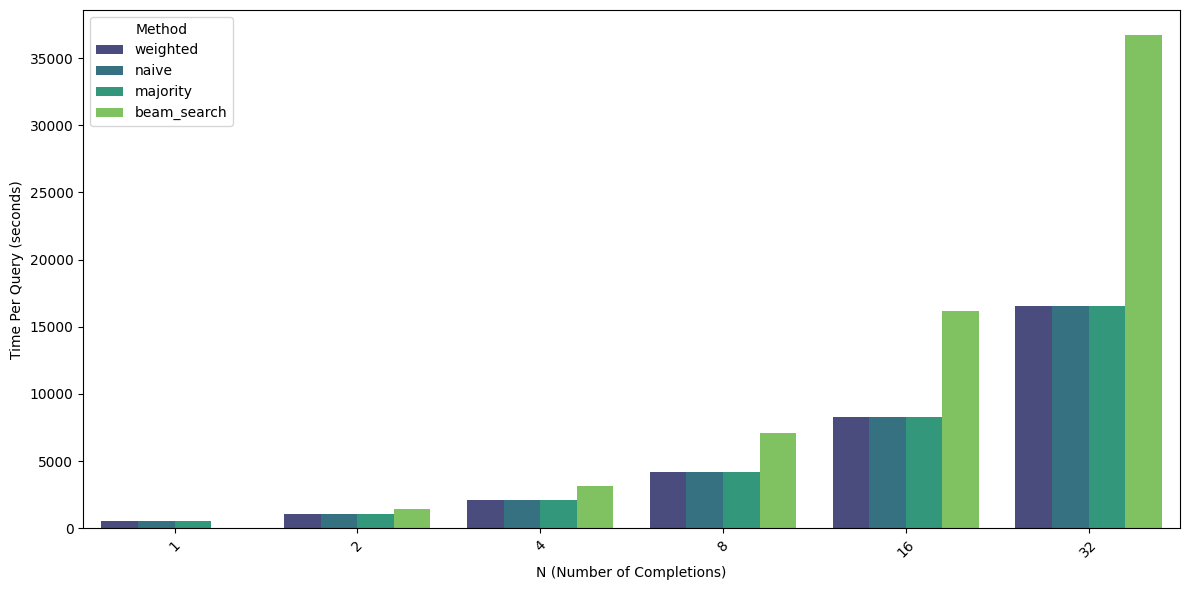

In [22]:
# plot average token count by method and N.
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12, 6))
sns.barplot(
    data=predictor_df,
    x='N',
    y='token_count',
    hue='method',
    ci=None,
    palette='viridis'
)
# plt.title('Average Token Count by Method and N')
plt.xlabel('N (Number of Completions)')
plt.ylabel('Time Per Query (seconds)')
plt.legend(title='Method')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [23]:
# sanity check that melting worked correctly.
# predictor_df[predictor_df["sb_idx"] == 1]
# type(predictor_df["completion_tokens"][0]) 

### change completion_tokens to a list of ints.
# predictor_df["completion_tokens"] = predictor_df["completion_tokens"].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

In [24]:
# Compute length of question (aka, length of the string)
predictor_df["question_length"] = predictor_df["question"].str.len()
# predictor_df["token_count"] = predictor_df["completion_tokens"].apply(sum)
predictor_df = pd.get_dummies(predictor_df, columns=["method"])

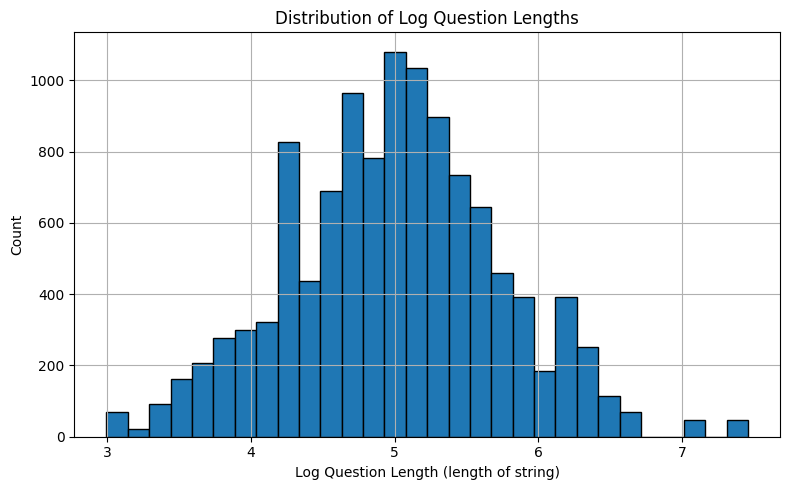

In [25]:
import matplotlib.pyplot as plt

# Create histogram
plt.figure(figsize=(8, 5))
plt.hist(np.log(predictor_df["question_length"]), bins=30, edgecolor='black')

plt.xlabel("Log Question Length (length of string)")
plt.ylabel("Count")
plt.title("Distribution of Log Question Lengths")
plt.grid(True)
plt.tight_layout()

# Show plot
plt.show()

### Plots of Accuracy

In [26]:
N_val = [1, 2, 4, 8, 16, 32]
mv_accuracy = np.mean(df_N8["indicator_maj_1"]), np.mean(df_N8["indicator_maj_2"]), np.mean(df_N8["indicator_maj_4"]), np.mean(df_N8["indicator_maj_8"]), np.mean(df_N8["indicator_maj_16"]), np.mean(df_N8["indicator_maj_32"])
BoN_vanilla_accuracy = np.mean(df_N8["indicator_naive_1"]), np.mean(df_N8["indicator_naive_2"]), np.mean(df_N8["indicator_naive_4"]), np.mean(df_N8["indicator_naive_8"]), np.mean(df_N8["indicator_naive_16"]), np.mean(df_N8["indicator_naive_32"])
BoN_weighted_accuracy = np.mean(df_N8["indicator_weighted_1"]), np.mean(df_N8["indicator_weighted_2"]), np.mean(df_N8["indicator_weighted_4"]), np.mean(df_N8["indicator_weighted_8"]), np.mean(df_N8["indicator_weighted_16"]), np.mean(df_N8["indicator_weighted_32"])
beam_accuracy = None, np.mean(beam_df[beam_df["N"] == 2]["indicator"]), np.mean(beam_df[beam_df["N"] == 4]["indicator"]), np.mean(beam_df[beam_df["N"] == 8]["indicator"]), np.mean(beam_df[beam_df["N"] == 16]["indicator"]), np.mean(beam_df[beam_df["N"] == 32]["indicator"])       
df_accuracy = pd.DataFrame({
    "N": N_val,
    "majority_vote": mv_accuracy,
    "BoN_vanilla": BoN_vanilla_accuracy,
    "BoN_weighted": BoN_weighted_accuracy,
    "beam_search": beam_accuracy
})

In [27]:
df_accuracy.head()

,N,majority_vote,BoN_vanilla,BoN_weighted,beam_search
0,1,0.402,0.402,0.402,NaN
1,2,0.402,0.466,0.466,0.362
2,4,0.472,0.522,0.536,0.578
3,8,0.532,0.564,0.580,0.666
4,16,0.578,0.588,0.622,0.700


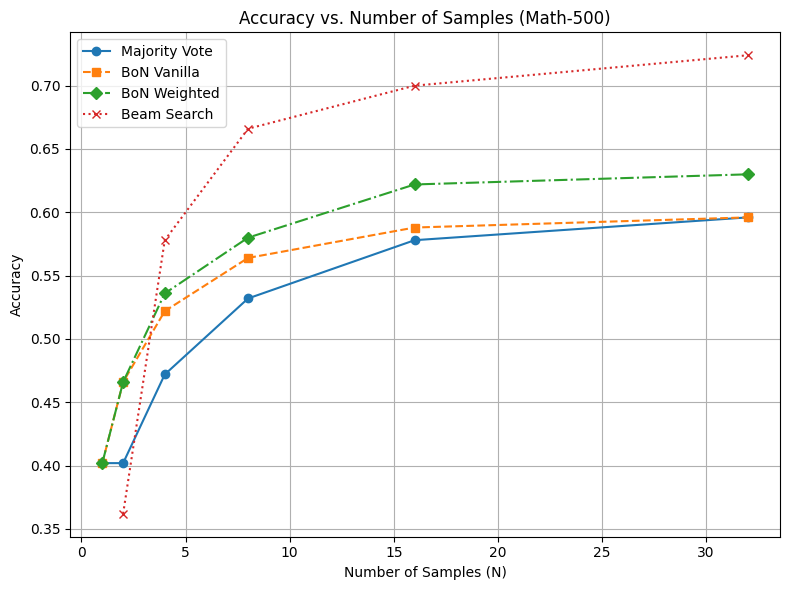

In [28]:
import matplotlib.pyplot as plt
import pandas as pd

# Create scatter plot of accuracy vs. number of samples
plt.figure(figsize=(8, 6))
plt.plot(df_accuracy["N"], df_accuracy["majority_vote"], 'o-', label="Majority Vote")
plt.plot(df_accuracy["N"], df_accuracy["BoN_vanilla"], 's--', label="BoN Vanilla")
plt.plot(df_accuracy["N"], df_accuracy["BoN_weighted"], 'D-.', label="BoN Weighted")
plt.plot(df_accuracy["N"], df_accuracy["beam_search"], 'x:', label="Beam Search")

# Formatting
plt.xlabel("Number of Samples (N)")
plt.ylabel("Accuracy")
plt.title("Accuracy vs. Number of Samples (Math-500)")
plt.legend()
plt.grid(True)
plt.tight_layout()

# plt.savefig("accuracy_vs_N_Math500_Bo32.png", dpi=300)
plt.show()

In [29]:
# save to csv (now has beam search data included).
# output_file = "/dccstor/gma2/jhjenny9/search-and-learn/data/Qwen/Qwen2.5-1.5B-Instruct/best_of_32/hardlabel_predictor_df.csv"
# predictor_df.to_csv(output_file, index=False)

# read df.
# predictor_df = pd.read_csv(output_file)

In [30]:
predictor_df.head(5)

,question,score,completion_tokens,sb_idx,indicator,N,time,token_count,question_length,method_beam_search,method_majority,method_naive,method_weighted
0,"Convert the point $(0,3)$ in rectangular coord...","[1.0, 0.169921875, 1.0, 0.361328125, 1.0, 1.0,...","[271, 290, 269, 220, 220, 403, 261, 310, 260, ...",0,1,1,2.37,271,161,False,False,False,True
1,Define\n\[p = \sum_{k = 1}^\infty \frac{1}{k^2...,"[0.640625, 0.98046875, 0.0030822754, 1.0, 0.12...","[1064, 872, 964, 654, 831, 680, 1384, 832, 103...",1,0,1,3.95,1064,217,False,False,False,True
2,"If $f(x) = \frac{3x-2}{x-2}$, what is the valu...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[432, 256, 460, 509, 505, 462, 437, 512, 360, ...",2,1,1,2.67,432,113,False,False,False,True
3,How many positive whole-number divisors does 1...,"[0.9921875, 1.0, 1.0, 0.9921875, 1.0, 0.90625,...","[441, 382, 489, 163, 415, 248, 250, 251, 354, ...",3,1,1,1.85,441,54,False,False,False,True
4,The results of a cross-country team's training...,"[0.9609375, 0.99609375, 0.99609375, 0.9921875,...","[476, 307, 330, 468, 781, 203, 427, 746, 340, ...",4,1,1,1.82,476,731,False,False,False,True


In [31]:
# Transform method columns into a single 'method' column.

def decode_method(row):
    if row["method_majority"]:
        return "majority"
    elif row["method_naive"]:
        return "naive"
    elif row["method_weighted"]:
        return "weighted"
    elif row["method_beam_search"]:
        return "beam_search"
    else:
        return "unknown"

# Apply the function row-wise
predictor_df["method"] = predictor_df.apply(decode_method, axis=1)

In [32]:
# find the mean token_count for each method and N.
mean_token_count = predictor_df.groupby(["method", "N"])["token_count"].mean()
mean_token_count

method       N 
beam_search  2      1402.114
             4      3145.578
             8      7122.170
             16    16203.502
             32    36738.184
majority     1       526.332
             2      1049.362
             4      2101.906
             8      4177.702
             16     8283.908
             32    16516.854
naive        1       526.332
             2      1049.362
             4      2101.906
             8      4177.702
             16     8283.908
             32    16516.854
weighted     1       526.332
             2      1049.362
             4      2101.906
             8      4177.702
             16     8283.908
             32    16516.854
Name: token_count, dtype: float64

In [33]:
# create train/test split based on 'sb_idx' (query identifier)
from sklearn.model_selection import train_test_split

unique_sb_idx = predictor_df['sb_idx'].unique()

# Split sb_idx into train/test
sb_idx_train, sb_idx_test = train_test_split(
    unique_sb_idx,
    test_size=0.20, # .15
    random_state=6
)

# Divide queries (represented by sb_idx) into train and test
df_train = predictor_df[predictor_df['sb_idx'].isin(sb_idx_train)].reset_index(drop=True)
df_test = predictor_df[predictor_df['sb_idx'].isin(sb_idx_test)].reset_index(drop=True)

### Prepare Features for Difficulty Probe.

In [34]:
df_train.shape, df_test.shape # 23 configuration (18 sequential + 5 beam-search)
# save df_train and df_test to csv.
# df_train.to_csv("/dccstor/gma2/jhjenny9/search-and-learn/data/all_indicator_train.csv", index=False)
# df_test.to_csv("/dccstor/gma2/jhjenny9/search-and-learn/data/all_indicator_test.csv", index=False)

((9200, 14), (2300, 14))

In [35]:
import pandas as pd
import numpy as np
import argparse
import os
import torch
from transformers import BertTokenizer, BertModel
from tqdm import tqdm
import random
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score



print("CUDA available:", torch.cuda.is_available())
print("CUDA device name:", torch.cuda.get_device_name(0) if torch.cuda.is_available() else "No GPU")
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


from transformers import AutoTokenizer, AutoModelForCausalLM
# Load the model and tokenizer
model_name = "Qwen/Qwen2.5-1.5B-Instruct"
qwen = AutoModelForCausalLM.from_pretrained(model_name, trust_remote_code=True)
tokenizer = AutoTokenizer.from_pretrained(model_name, trust_remote_code=True)

def get_embedding(text, model, tokenizer, device):
    """
    Extracts an embedding from the last token of the last hidden layer
    for a given input text.
    
    Args:
        text (str): Input query
        model (PreTrainedModel): Qwen model
        tokenizer (PreTrainedTokenizer): Corresponding tokenizer
        device (str): Device to run on ("cuda" or "cpu")
    
    Returns:
        np.ndarray: Embedding vector of shape (hidden_dim,)
    """
    # Tokenize the input
    inputs = tokenizer(text, return_tensors="pt", truncation=True, padding=True)
    input_ids = inputs["input_ids"].to(device)

    # Run the model to get hidden states
    with torch.no_grad():
        outputs = model(input_ids=input_ids, output_hidden_states=True, return_dict=True)

    # Extract last token embedding from the last hidden layer
    last_hidden_state = outputs.hidden_states[-1]  # shape: [1, seq_len, hidden_dim]
    embedding = last_hidden_state[:, -1, :]        # shape: [1, hidden_dim]

    return embedding.squeeze().cpu().numpy()

KeyboardInterrupt: 

In [ ]:
df_test.head()

,question,score,completion_tokens,sb_idx,indicator,N,time,token_count,question_length,method_beam_search,method_majority,method_naive,method_weighted,method
0,"If $f(x) = \frac{3x-2}{x-2}$, what is the valu...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[432, 256, 460, 509, 505, 462, 437, 512, 360, ...",2,1,1,2.67,432,113,False,False,False,True,weighted
1,What is the least positive integer multiple of...,"[0.86328125, 0.0708007812, 0.5546875, 0.878906...","[512, 316, 1032, 412, 609, 423, 354, 431, 595,...",10,1,1,2.47,512,99,False,False,False,True,weighted
2,"The proper divisors of 12 are 1, 2, 3, 4 and 6...","[0.640625, 1.0, 0.99609375, 1.0, 0.1137695312,...","[176, 365, 285, 839, 427, 359, 355, 411, 300, ...",12,1,1,1.85,176,215,False,False,False,True,weighted
3,The volume of the cylinder shown is $45\pi$ cu...,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[277, 248, 237, 251, 221, 198, 152, 248, 282, ...",13,1,1,0.98,277,384,False,False,False,True,weighted
4,Compute: $1-2+3-4+5- \dots +99-100$.,"[1.0, 1.0, 1.0, 1.0, 0.99609375, 1.0, 1.0, 0.9...","[152, 262, 236, 215, 178, 264, 226, 202, 239, ...",16,1,1,1.24,152,36,False,False,False,True,weighted


### Load in Training/Testing Data

In [36]:
# read in output from extract_features.py: X_train and y_train hard labels from .npz file.
output_X_train = "/dccstor/gma2/jhjenny9/search-and-learn/data/seq-beam-qwen/X_train.npy"
output_y_train = "/dccstor/gma2/jhjenny9/search-and-learn/data/seq-beam-qwen/y_train.npy"
X_train = np.load(output_X_train)
y_train = np.load(output_y_train)
output_X_test = "/dccstor/gma2/jhjenny9/search-and-learn/data/seq-beam-qwen/X_test.npy"
output_y_test = "/dccstor/gma2/jhjenny9/search-and-learn/data/seq-beam-qwen/y_test.npy"
X_test = np.load(output_X_test)
y_test = np.load(output_y_test) 


In [37]:
y_proba = np.load("/dccstor/gma2/jhjenny9/search-and-learn/data/seq-beam-qwen/test_probs.npy")
y_proba.shape

(2300,)

In [38]:
X_test.shape

(2300, 1542)

### Plotting Feature Importance.

In [39]:
# split high-dimensional CLS and interpretable features
cls_dim = 1536 # len(cls_vec)
cls_part = X_train[:, :cls_dim]
named_features = pd.DataFrame(
    X_train[:, cls_dim:],  # shape (n_samples, 5)
    columns=["num_samples", "question_length", "method_maj", "method_naive", "method_weighted", "method_beam_search"]
)

In [48]:
named_features["method_beam_search"].value_counts()

method_beam_search
0.0    7200
1.0    2000
Name: count, dtype: int64

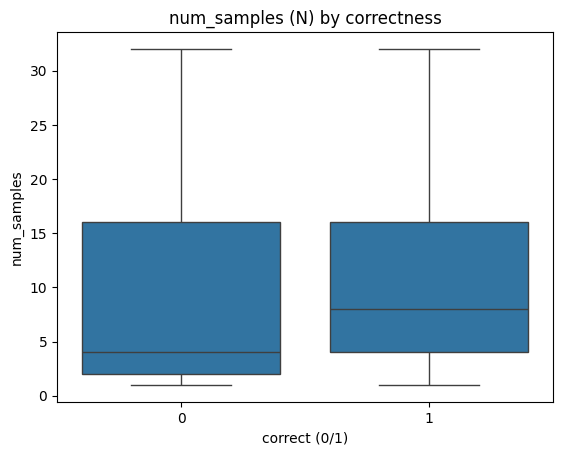

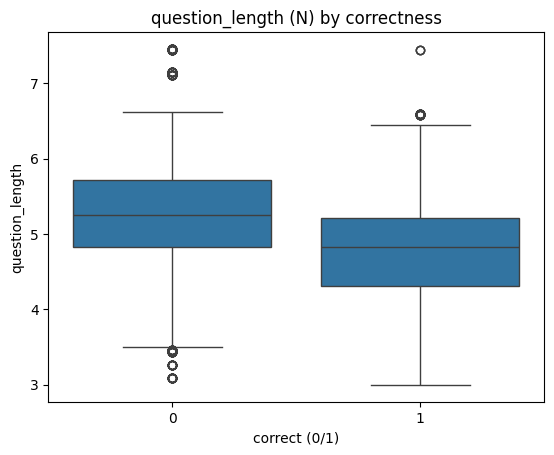

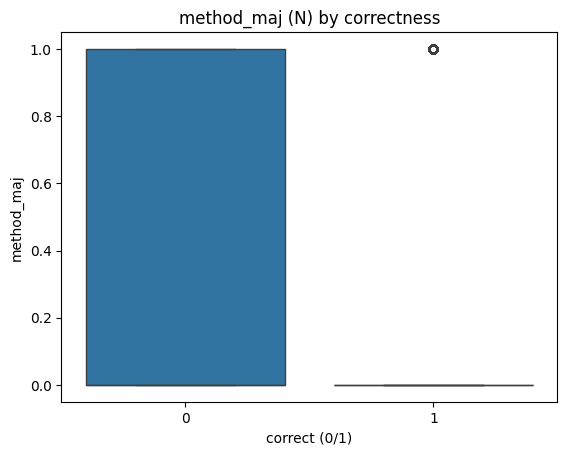

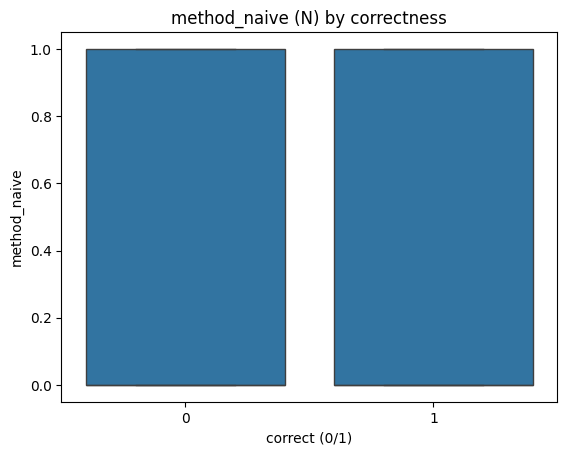

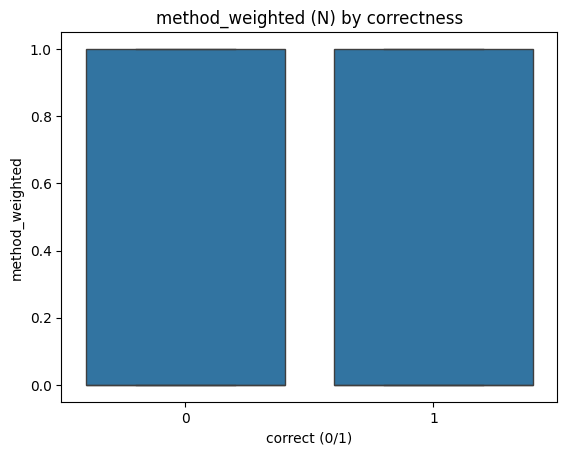

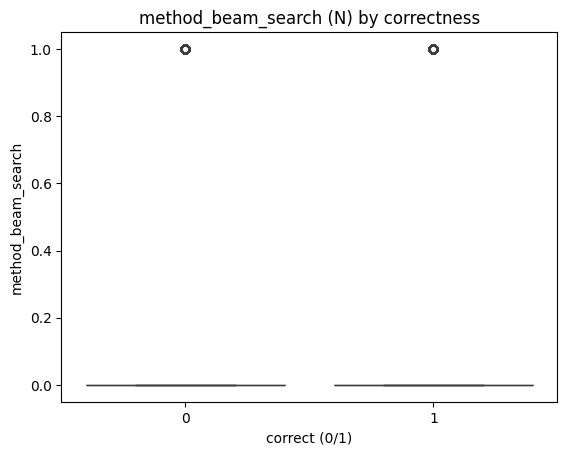

In [ ]:
import seaborn as sns

for col in named_features.columns:
    sns.boxplot(x=y_train, y=named_features[col])
    plt.title(f"{col} (N) by correctness")
    plt.xlabel("correct (0/1)")
    plt.ylabel(col)
    plt.show()

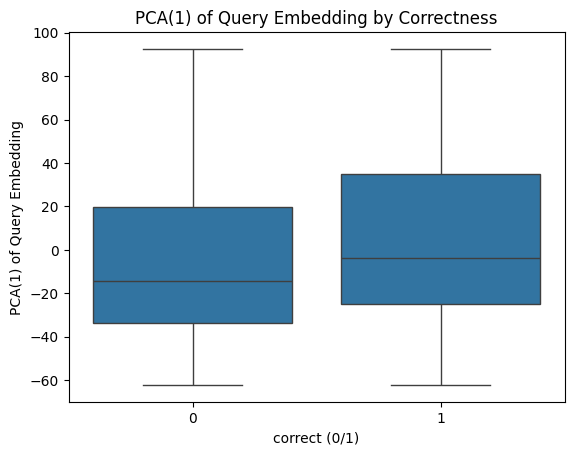

In [ ]:
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt

# Reduce to 1D or 2D
pca = PCA(n_components=1)
cls_1d = pca.fit_transform(cls_part)[:, 0]

# Plot 1D PCA of CLS
sns.boxplot(x=y_train, y=cls_1d)
plt.title("PCA(1) of Query Embedding by Correctness")
plt.xlabel("correct (0/1)")
plt.ylabel("PCA(1) of Query Embedding")
plt.show()

### Train MLP.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)

In [ ]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((9200, 1542), (9200,), (2300, 1542), (2300,))

### MLP Classifier from sklearn

In [ ]:
# 2-layer MLP Binary Classifier
mlp_clf = MLPClassifier(hidden_layer_sizes=(128, 64), activation='relu', max_iter=500, random_state=42)
mlp_clf.fit(X_train, y_train)
y_pred = mlp_clf.predict(X_test)
acc = accuracy_score(y_test, y_pred)

/dccstor/gma2/jhjenny9/envs/model_serve/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:787: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


### Create Custom MLP (to compare with soft labels)

In [ ]:
import torch.nn as nn                       
from torch.utils.data import Dataset, DataLoader
import torch.optim as optim

In [ ]:
# ----- 2. Dataset Definition -----
class HardLabelDataset(Dataset):
    def __init__(self, X, y):
        self.X = torch.tensor(X, dtype=torch.float32)
        self.y = torch.tensor(y, dtype=torch.float32).unsqueeze(1)

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

# ----- 3. Dataloaders -----
train_dataset = HardLabelDataset(X_train, y_train)
val_dataset = HardLabelDataset(X_test, y_test)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=64, shuffle=False)

# ----- 4. MLP Model -----
class MLP(nn.Module):
    def __init__(self, input_dim):
        super(MLP, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(input_dim, 64),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Dropout(0.5), 
            nn.Linear(32, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.model(x)

model = MLP(input_dim=773)

# ----- 5. Loss and Optimizer -----
criterion = nn.BCELoss()  # for binary classification.
optimizer = optim.Adam(model.parameters(), lr=1e-3, weight_decay=1e-5)

In [ ]:
# ----- 6. Training Loop -----
num_epochs = 50

for epoch in range(num_epochs):
    # Training
    model.train()
    running_loss = 0.0
    for batch_X, batch_y in train_loader:
        optimizer.zero_grad()
        outputs = model(batch_X)
        loss = criterion(outputs, batch_y)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    # Validation
    model.eval()
    val_loss = 0.0
    with torch.no_grad():
        for val_X, val_y in val_loader:
            val_preds = model(val_X)
            val_loss += criterion(val_preds, val_y).item()

    print(f"Epoch {epoch+1}, Train Loss: {running_loss:.4f}, Val Loss: {val_loss:.4f}")

Epoch 1, Train Loss: 73.1260, Val Loss: 18.5500
Epoch 2, Train Loss: 67.2875, Val Loss: 17.9439
Epoch 3, Train Loss: 63.4227, Val Loss: 18.0526
Epoch 4, Train Loss: 59.7714, Val Loss: 18.9592
Epoch 5, Train Loss: 55.8209, Val Loss: 18.5881
Epoch 6, Train Loss: 52.2096, Val Loss: 20.2118
Epoch 7, Train Loss: 49.3038, Val Loss: 20.5478
Epoch 8, Train Loss: 47.3461, Val Loss: 21.1404
Epoch 9, Train Loss: 46.8979, Val Loss: 22.0785
Epoch 10, Train Loss: 44.1646, Val Loss: 22.4487
Epoch 11, Train Loss: 44.7147, Val Loss: 23.7432
Epoch 12, Train Loss: 42.1704, Val Loss: 22.5579
Epoch 13, Train Loss: 42.1125, Val Loss: 24.1300
Epoch 14, Train Loss: 43.1404, Val Loss: 23.5544
Epoch 15, Train Loss: 41.9831, Val Loss: 25.0726
Epoch 16, Train Loss: 41.2219, Val Loss: 26.8520
Epoch 17, Train Loss: 40.8997, Val Loss: 27.4667
Epoch 18, Train Loss: 40.0469, Val Loss: 29.8458
Epoch 19, Train Loss: 37.5169, Val Loss: 30.3376
Epoch 20, Train Loss: 37.2348, Val Loss: 30.1871
Epoch 21, Train Loss: 36.8039

#### Make Predictions on Test (HL).

In [ ]:
model.eval()
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)

with torch.no_grad():
    hardLabel_Preds = model(X_test_tensor)

In [ ]:
hardLabel_preds_numpy = hardLabel_Preds.squeeze().cpu().numpy()
hardLabel_preds_numpy

array([7.5929022e-01, 3.0358072e-07, 9.5807320e-01, ..., 9.9913675e-01,
       3.4155384e-02, 1.5820242e-01], dtype=float32)

In [ ]:
# 2-layer MLP Binary Classifier
# mlp_clf = MLPClassifier(hidden_layer_sizes=(128, 64), activation='relu', max_iter=500, random_state=42)
# mlp_clf.fit(X_train, y_train)
# Get predicted probabilities
# y_proba = mlp_clf.predict_proba(X_test)[:, 1]
y_pred = (y_proba > 0.5).astype(int)
acc = accuracy_score(y_test, y_pred)
print(f"Binary Classification Accuracy: {acc:.4f}")

Binary Classification Accuracy: 0.6483


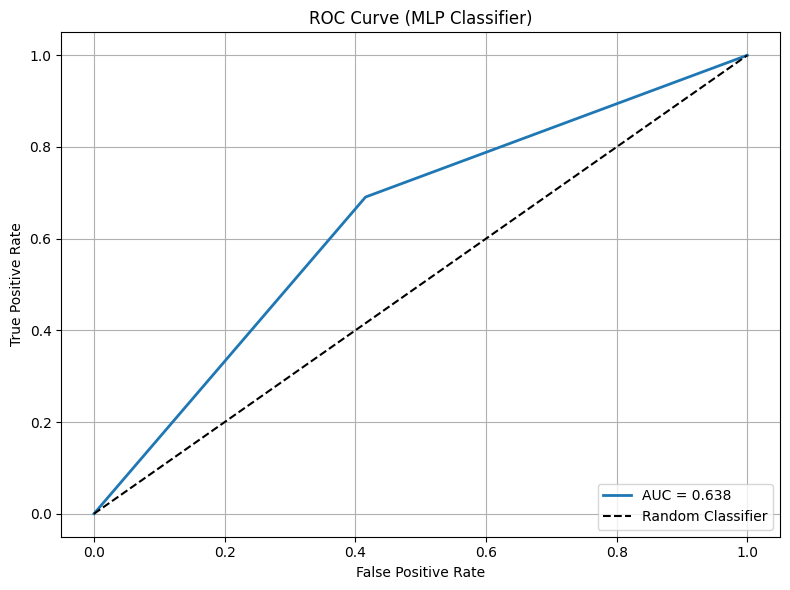

In [ ]:
# AUC with all features.

from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Get predicted probabilities for the positive class
# y_proba = mlp_clf.predict_proba(X_train)[:, 1]
y_pred = (y_proba >= 0.5).astype(int)
# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# Compute AUC
auc = roc_auc_score(y_test, y_pred)

# Plot
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"AUC = {auc:.3f}", linewidth=2)
plt.plot([0, 1], [0, 1], 'k--', label="Random Classifier")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve (MLP Classifier)")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
# plt.show()

### Train XGBoost Classifier

In [ ]:
import xgboost as xgb

XGBoostmodel = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
XGBoostmodel.fit(X_train, y_train)

/dccstor/gma2/jhjenny9/envs/model_serve/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [13:01:10] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,'logloss'


In [ ]:
# features without N.
y_pred = model.predict(X_test)

acc = accuracy_score(y_test, y_pred)
print(f"Binary Classification Accuracy: {acc:.4f}")

Binary Classification Accuracy: 0.6578


In [ ]:
# compute AUC
# Get predicted probabilities for the positive class (label 1)
y_proba = model.predict_proba(X_test)[:, 1]

# Compute AUC
auc = roc_auc_score(y_test, y_proba)
print(f"AUC: {auc:.4f}")

AUC: 0.6927


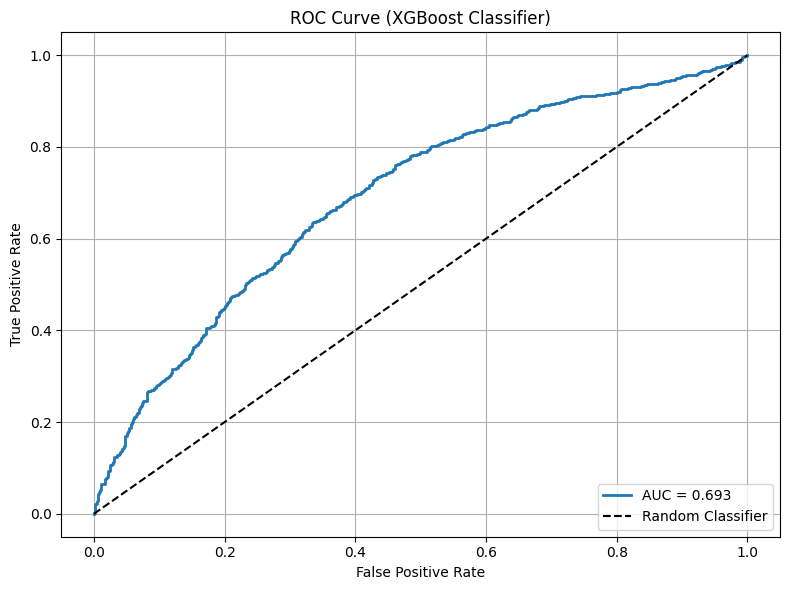

In [ ]:
# AUC with all features.

from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba)

# Plot
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"AUC = {auc:.3f}", linewidth=2)
plt.plot([0, 1], [0, 1], 'k--', label="Random Classifier")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve (XGBoost Classifier)")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()

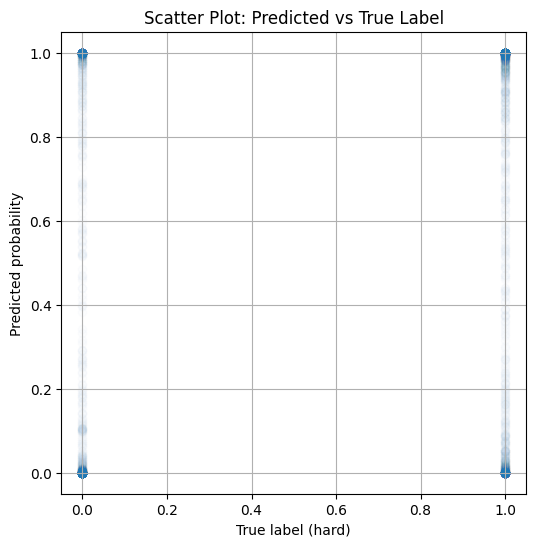

In [50]:
import matplotlib.pyplot as plt
# the XGBoost model does slightly better in outputting predicted probabilities.
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_proba, alpha=1e-2)
plt.xlabel("True label (hard)")
plt.ylabel("Predicted probability")
plt.title("Scatter Plot: Predicted vs True Label")
plt.grid(True)
plt.show()

In [ ]:
import shap

explainer = shap.Explainer(model, X_train)     # TreeExplainer under the hood
shap_values = explainer(X_test)               # SHAP values for each sample

/dccstor/gma2/jhjenny9/envs/model_serve/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
question_embedding_shap = shap_values.values[:, :-7]
num_samples_shap = shap_values.values[:, -6]
question_length_shap = shap_values.values[:, -5]
method_maj_shap = shap_values.values[:, -4]
method_naive_shap = shap_values.values[:, -3]
method_weighted_shap = shap_values.values[:, -2]
method_beam_search_shap = shap_values.values[:, -1]  # Beam search method

# Summary statistics
print(f"Mean SHAP value for 'question embedding': {question_embedding_shap.mean():.4f}")
print(f"Mean SHAP value for 'num samples': {num_samples_shap.mean():.4f}")
print(f"Mean SHAP value for 'question length': {question_length_shap.mean():.4f}")
print(f"Mean SHAP value for 'method_maj': {method_maj_shap.mean():.4f}")
print(f"Mean SHAP value for 'method_naive': {method_naive_shap.mean():.4f}")
print(f"Mean SHAP value for 'method_weighted': {method_weighted_shap.mean():.4f}")
print(f"Mean SHAP value for 'method_beam_search': {method_beam_search_shap.mean():.4f}")

Mean SHAP value for 'question embedding': -0.0004
Mean SHAP value for 'num samples': 0.0034
Mean SHAP value for 'question length': -0.0140
Mean SHAP value for 'method_maj': -0.0279
Mean SHAP value for 'method_naive': 0.0297
Mean SHAP value for 'method_weighted': -0.0240
Mean SHAP value for 'method_beam_search': 0.0122


In [ ]:
# predict probability of positive class (correct answer) for test set.
# XGBoost Classifier.
# y_proba = model.predict_proba(X_test)[:, 1]
df_test['predicted_prob'] = y_proba

In [ ]:
# df_train['predicted_prob'] = hardLabel_preds_numpy
# df_test['predicted_prob'] = hardLabel_preds_numpy # PyTorch MLP predictions from hard label.
# df_train['predicted_prob'] = y_proba_train # sklearn MLPClassifier predictions (hard label version)

In [ ]:
# there should be 23 different BoN configurations for each query in the test set.
df_test.groupby('sb_idx').size().reset_index(name='count')

,sb_idx,count
0,2,23
1,10,23
2,12,23
3,13,23
4,16,23
...,...,...
95,478,23
96,480,23
97,486,23
98,495,23


In [ ]:
df_test.head()

,question,score,completion_tokens,sb_idx,indicator,N,time,token_count,question_length,method_beam_search,method_majority,method_naive,method_weighted,method,predicted_prob
0,"If $f(x) = \frac{3x-2}{x-2}$, what is the valu...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[432, 256, 460, 509, 505, 462, 437, 512, 360, ...",2,1,1,2.67,432,113,False,False,False,True,weighted,0.990506
1,What is the least positive integer multiple of...,"[0.86328125, 0.0708007812, 0.5546875, 0.878906...","[512, 316, 1032, 412, 609, 423, 354, 431, 595,...",10,1,1,2.47,512,99,False,False,False,True,weighted,0.000013
2,"The proper divisors of 12 are 1, 2, 3, 4 and 6...","[0.640625, 1.0, 0.99609375, 1.0, 0.1137695312,...","[176, 365, 285, 839, 427, 359, 355, 411, 300, ...",12,1,1,1.85,176,215,False,False,False,True,weighted,0.909646
3,The volume of the cylinder shown is $45\pi$ cu...,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[277, 248, 237, 251, 221, 198, 152, 248, 282, ...",13,1,1,0.98,277,384,False,False,False,True,weighted,0.990648
4,Compute: $1-2+3-4+5- \dots +99-100$.,"[1.0, 1.0, 1.0, 1.0, 0.99609375, 1.0, 1.0, 0.9...","[152, 262, 236, 215, 178, 264, 226, 202, 239, ...",16,1,1,1.24,152,36,False,False,False,True,weighted,0.016633


In [54]:
df_test['predicted_prob'] = y_proba

In [55]:
df_test_beam = df_test[df_test["method"] == "beam_search"]

In [56]:
# get the average accuracy and token_count for each configuration of step-beam that was run.
config_summary_df = df_test_beam.groupby(["N", "method"])[
    ["indicator", "predicted_prob", "token_count", "time"] # accuracy keeps track of Pass@N (aka, percentage of correct answers).
].mean().reset_index()

In [ ]:
config_summary_df.head(20)

,N,method,indicator,predicted_prob,token_count,time
0,1,majority,0.45,0.239260,526.64,2.4575
1,1,naive,0.45,0.380488,526.64,2.5114
2,1,weighted,0.45,0.384545,526.64,2.5114
3,2,beam_search,0.44,0.445965,1295.12,5.8316
4,2,majority,0.45,0.338449,972.13,2.9484
5,2,naive,0.51,0.454956,972.13,3.0595
6,2,weighted,0.51,0.456411,972.13,3.0595
7,4,beam_search,0.65,0.732065,2648.84,7.5129
8,4,majority,0.50,0.444444,1988.49,3.0719
9,4,naive,0.58,0.567278,1988.49,3.2847


### Plot of Accuracies per Configuration

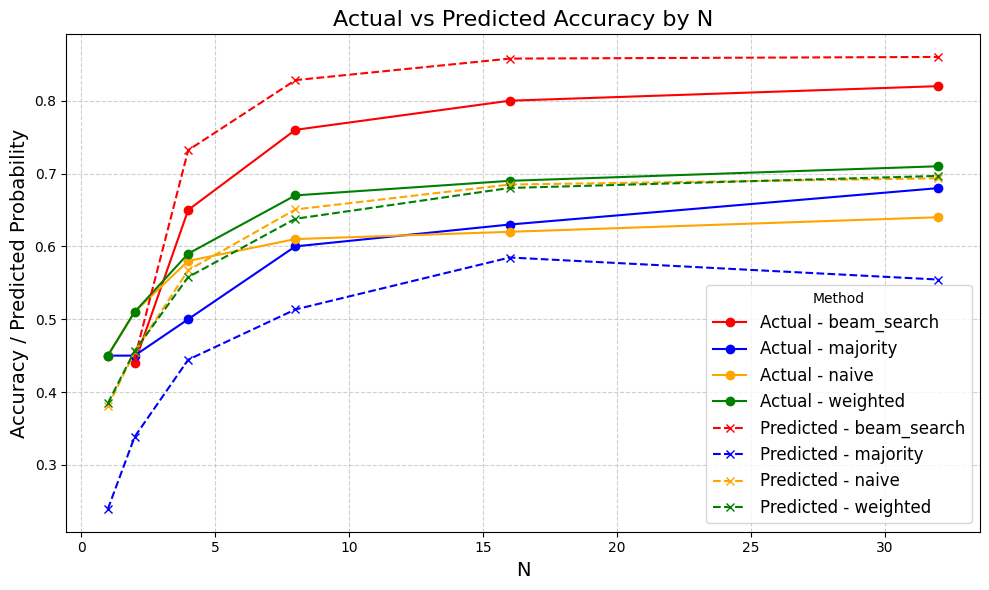

In [ ]:
import matplotlib.pyplot as plt

# Define a consistent color mapping for methods
method_colors = {
    "majority": "blue",
    "naive": "orange",
    "weighted": "green",
    "beam_search": "red"
}

# Pivot tables for actual and predicted accuracy
actual_pivot_df = config_summary_df.pivot(index="N", columns="method", values="indicator")
predicted_pivot_df = config_summary_df.pivot(index="N", columns="method", values="predicted_prob")

# Create a plot
plt.figure(figsize=(10, 6))

# Plot actual accuracy
for method in actual_pivot_df.columns:
    color = method_colors.get(method, "gray")  # Default to gray if method is not in the mapping
    plt.plot(actual_pivot_df.index, actual_pivot_df[method], marker='o', linestyle='-', color=color, label=f"Actual - {method}")

# Plot predicted accuracy
for method in predicted_pivot_df.columns:
    color = method_colors.get(method, "gray")  # Use the same color as the actual line
    plt.plot(predicted_pivot_df.index, predicted_pivot_df[method], marker='x', linestyle='--', color=color, label=f"Predicted - {method}")

# Add labels and title
plt.title("Actual vs Predicted Accuracy by N", fontsize=16)
plt.xlabel("N", fontsize=14)
plt.ylabel("Accuracy / Predicted Probability", fontsize=14)
plt.legend(title="Method", fontsize=12)
plt.grid(True, linestyle="--", alpha=0.6)

# Show the plot
plt.tight_layout()
plt.show()

### Optimal-Utility Router

$$\text{Utility}(x, m) = \hat{a}_m(x) - \lambda \cdot \text{Cost}_m(x)$$

$$\text{Query-adaptive}(x, m) = \argmax_m \; \text{Utility}(x, m)

Input: A dataframe that contains rows for different settings (beam size, beam width, chunk size, etc.) and includes: an accuracy column, an avg_cot_token_count column (which is the cost), and a sb_idx column (which is the query).

A parameter, lambda, that controls how much the user is willing to tradeoff accuracy and cost.

For each group (i.e., all rows of the same query, or sb_idx):

It computes a utility value for each row:

$$\text{Utility}(x, m) = \hat{a}_m(x) - \lambda \cdot \text{Cost}_m(x)$$

It finds the row with the highest utility in that group.

Output:
A new DataFrame where each row corresponds to a query and contains:
the best utility found, the accuracy, and cost for that best-performing configuration.

In [57]:
# filter for only method_beam_search.
df_test_beam = df_test[df_test["method"] == "beam_search"]

In [58]:
def compute_max_utility_pred(df, lambda_):
    def get_max_utility(group): # verified correctness.
        group = group.copy()
        group["utility"] = group["predicted_prob"] - lambda_ * group["time"]
        idx_max = group["utility"].idxmax()
        # print("max utility index is: ", idx_max)
        return pd.Series({
            "max_utility": group.loc[idx_max, "utility"],
            "max_predicted_prob": group.loc[idx_max, "predicted_prob"],
            "max_indicator": group.loc[idx_max, "indicator"], # indicator that keeps track of whether the answer is correct.
            "max_cost": group.loc[idx_max, "token_count"],
            "max_time": group.loc[idx_max, "time"],
            "N": group.loc[idx_max, "N"],
            "method": group.loc[idx_max, "method"],
        })

    result_df = df.groupby("sb_idx").apply(get_max_utility).reset_index()
    return result_df

# how probe performs for different subsets (e.g., best-of-1 prob of success). plot accuracy curves against predicted probs.

Selected questions: [138 386 212  30 265  32 224 461 377 211 379 273 177  12 495 363 408 360
 283 298 179 446 137 305  13]


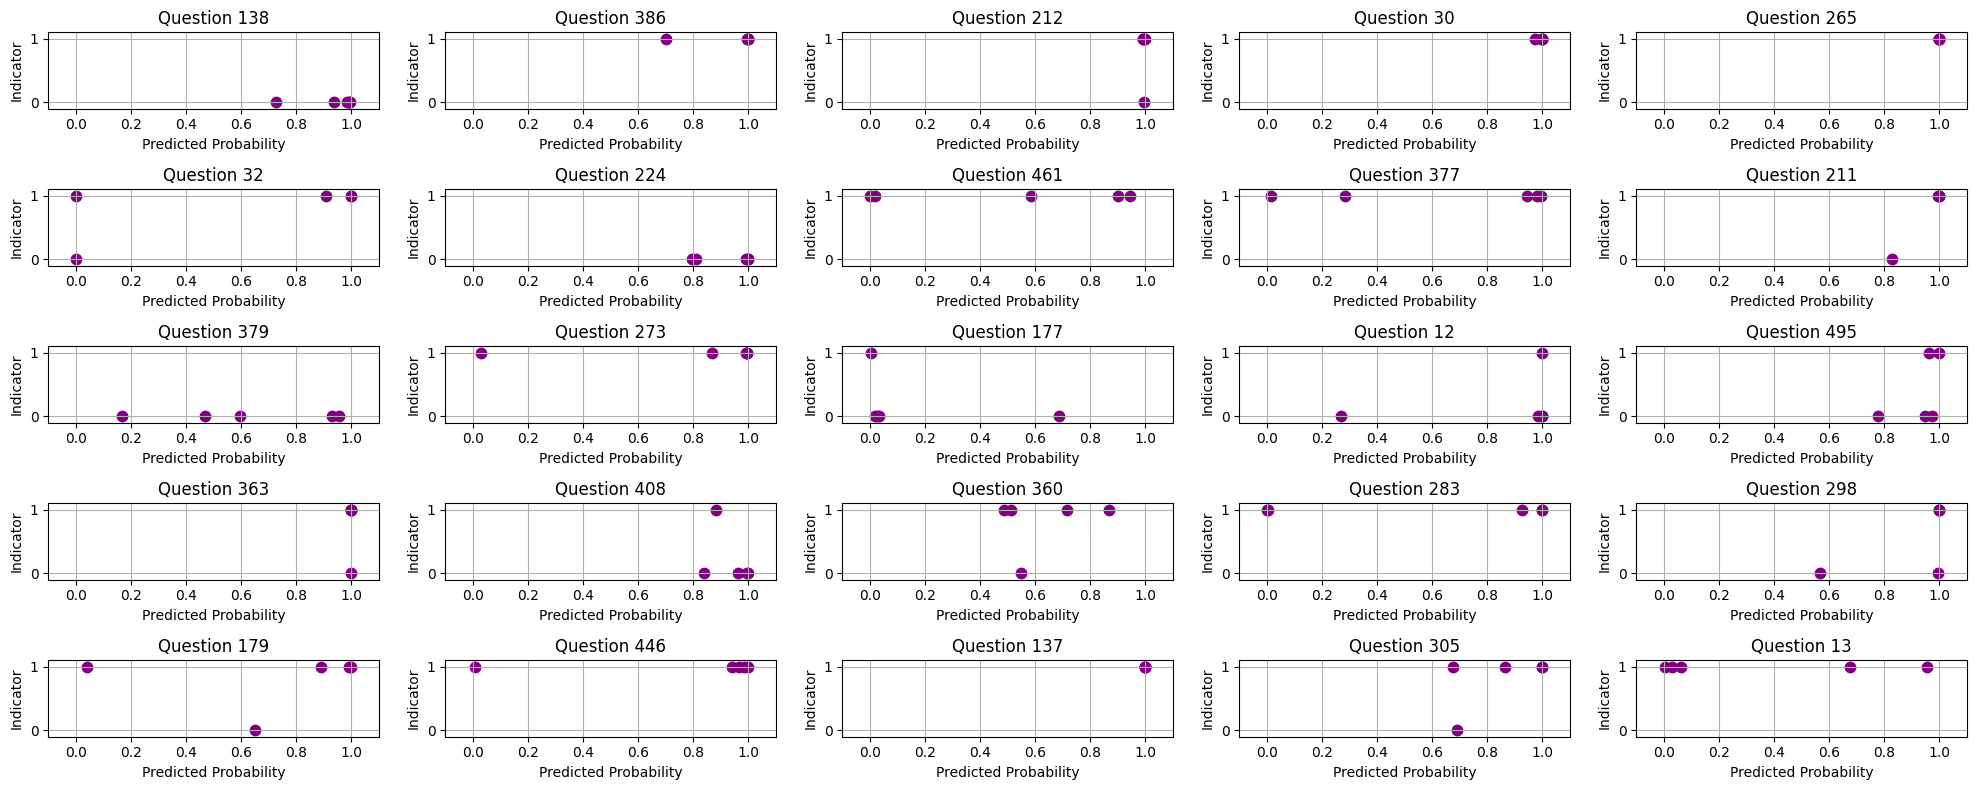

In [ ]:
# import matplotlib.pyplot as plt
question = df_test_beam[df_test_beam["sb_idx"] == 10]
# select columns N, indicator, predicted_prob.
question[["N", "indicator", "predicted_prob"]]


# Randomly select 10 questions from the test set.
selected_questions = np.random.choice(df_test_beam["sb_idx"].unique(), 25, replace=False)
print(f"Selected questions: {selected_questions}")

# Create a 2x5 grid of subplots
fig, axes = plt.subplots(5, 5, figsize=(20, 8))
axes = axes.flatten()  # Flatten to make indexing easier

# Create plots for each selected question
for i, question_idx in enumerate(selected_questions):
    # Get data for this question
    question = df_test_beam[df_test_beam["sb_idx"] == question_idx]
    
    # Create scatter plot
    axes[i].scatter(question["predicted_prob"], question["indicator"], 
                    alpha=1, s=56, color="purple")
    axes[i].set_xlim(-0.1, 1.1)
    axes[i].set_ylim(-0.1, 1.1)
    axes[i].set_title(f"Question {question_idx}")
    axes[i].set_xlabel("Predicted Probability")
    axes[i].set_ylabel("Indicator")
    axes[i].grid(True)

plt.tight_layout()
plt.show()


Selected questions: [431 262 372 239 235 211 137 408  59   2 116 178 381 192 452  16 390 397
  69 179 265 446 143 224 363]


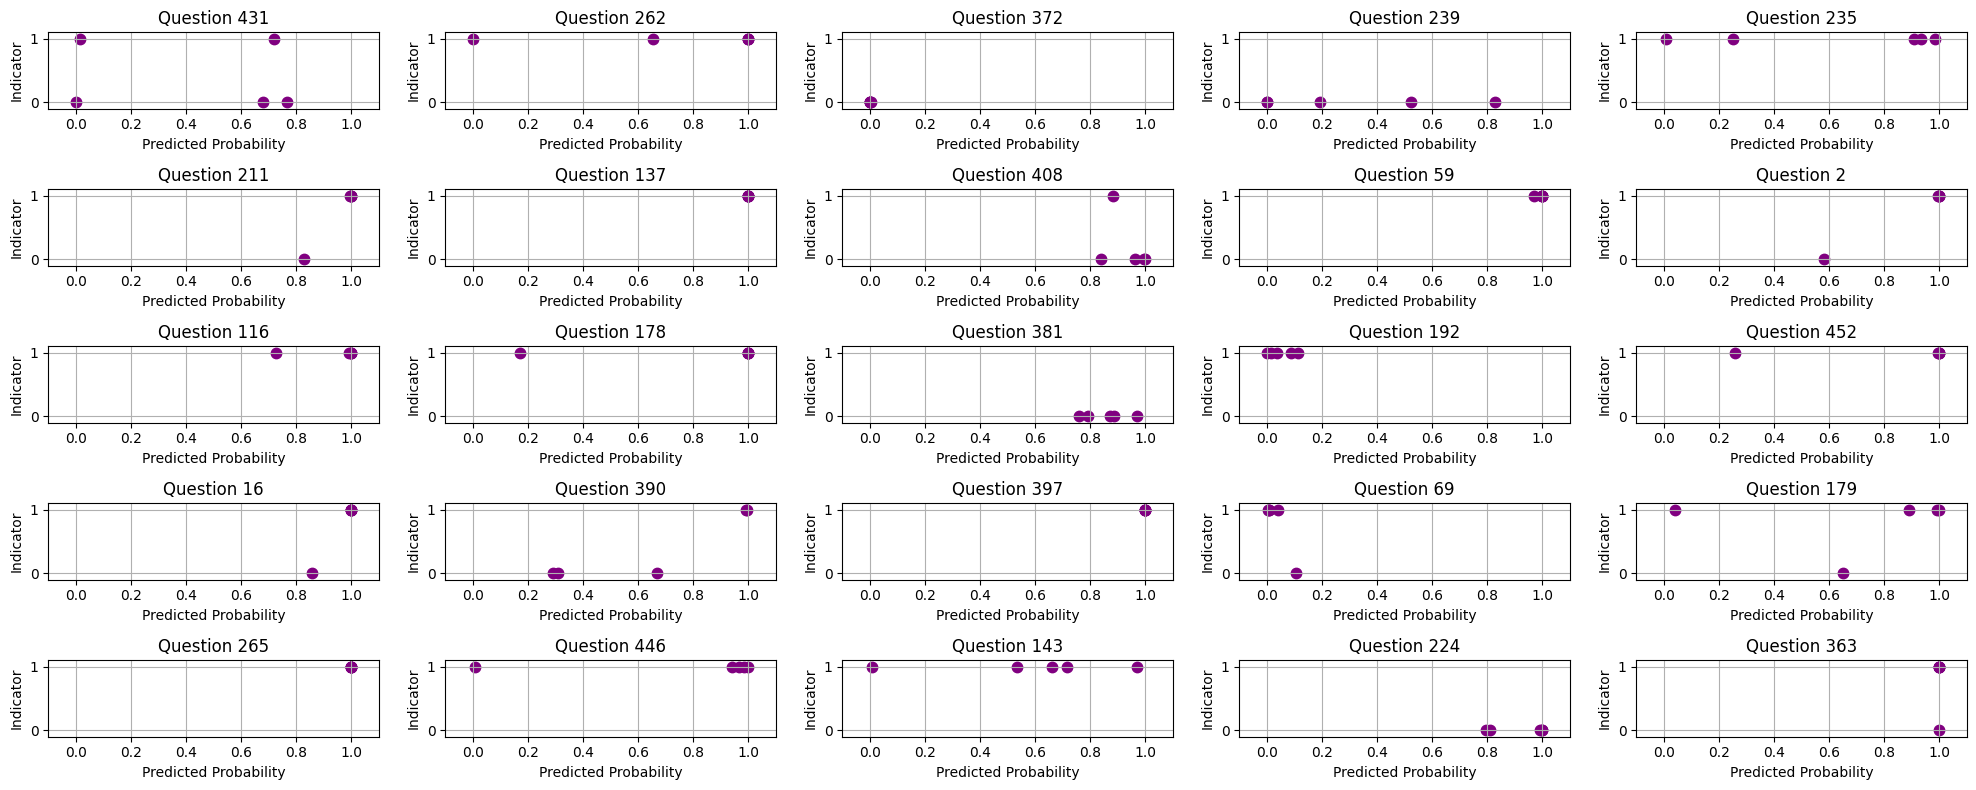


ACCOMPANYING TABLES FOR EACH SELECTED QUESTION

Question 431:
--------------------------------------------------
N     Indicator  Predicted Prob 
------------------------------
2.0   Incorrect  0.0001         
4.0   Correct    0.0150         
8.0   Incorrect  0.6807         
16.0  Correct    0.7181         
32.0  Incorrect  0.7673         

Total configurations for this question: 5
Correct predictions: 2
Average predicted probability: 0.4362
Min predicted probability: 0.0001
Max predicted probability: 0.7673

Question 262:
--------------------------------------------------
N     Indicator  Predicted Prob 
------------------------------
2.0   Correct    0.0024         
4.0   Correct    0.6548         
8.0   Correct    1.0000         
16.0  Correct    1.0000         
32.0  Correct    1.0000         

Total configurations for this question: 5
Correct predictions: 5
Average predicted probability: 0.7314
Min predicted probability: 0.0024
Max predicted probability: 1.0000

Question 372:
---

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random

# Set random seed for reproducibility
random.seed(42)
np.random.seed(42)

# Randomly select 10 questions from the test set.
selected_questions = np.random.choice(df_test_beam["sb_idx"].unique(), 25, replace=False)
print(f"Selected questions: {selected_questions}")

# Create a 2x5 grid of subplots
fig, axes = plt.subplots(5, 5, figsize=(20, 8))
axes = axes.flatten()  # Flatten to make indexing easier

# Create plots for each selected question
for i, question_idx in enumerate(selected_questions):
    # Get data for this question
    question = df_test_beam[df_test_beam["sb_idx"] == question_idx]
    
    # Create scatter plot
    axes[i].scatter(question["predicted_prob"], question["indicator"], 
                    alpha=1, s=56, color="purple")
    axes[i].set_xlim(-0.1, 1.1)
    axes[i].set_ylim(-0.1, 1.1)
    axes[i].set_title(f"Question {question_idx}")
    axes[i].set_xlabel("Predicted Probability")
    axes[i].set_ylabel("Indicator")
    axes[i].grid(True)


plt.tight_layout()
plt.show()

# Generate accompanying tables
print("\n" + "="*80)
print("ACCOMPANYING TABLES FOR EACH SELECTED QUESTION")
print("="*80)

for question_idx in selected_questions:
    question = df_test_beam[df_test_beam["sb_idx"] == question_idx]
    
    print(f"\nQuestion {question_idx}:")
    print("-" * 50)
    
    # Create a formatted table
    table_data = question[["N", "indicator", "predicted_prob"]].copy()
    table_data = table_data.sort_values("N")  # Sort by N for better readability
    
    # Format the table for display
    print(f"{'N':<5} {'Indicator':<10} {'Predicted Prob':<15}")
    print("-" * 30)
    
    for _, row in table_data.iterrows():
        indicator_str = "Correct" if row["indicator"] == 1 else "Incorrect"
        pred_prob_str = f"{row['predicted_prob']:.4f}"
        print(f"{row['N']:<5} {indicator_str:<10} {pred_prob_str:<15}")
    
    print(f"\nTotal configurations for this question: {len(table_data)}")
    print(f"Correct predictions: {table_data['indicator'].sum()}")
    print(f"Average predicted probability: {table_data['predicted_prob'].mean():.4f}")
    print(f"Min predicted probability: {table_data['predicted_prob'].min():.4f}")
    print(f"Max predicted probability: {table_data['predicted_prob'].max():.4f}")

# Summary statistics across all selected questions
print("\n" + "="*80)
print("SUMMARY STATISTICS ACROSS ALL SELECTED QUESTIONS")
print("="*80)

all_selected_data = df_test_beam[df_test_beam["sb_idx"].isin(selected_questions)]
print(f"Total data points across all selected questions: {len(all_selected_data)}")
print(f"Average predicted probability: {all_selected_data['predicted_prob'].mean():.4f}")
print(f"Overall accuracy (indicator mean): {all_selected_data['indicator'].mean():.4f}")
print(f"Correlation between predicted probability and indicator: {all_selected_data['predicted_prob'].corr(all_selected_data['indicator']):.4f}")

Number of questions in test set: 100
Mean proportion correct across all questions: 0.6940
Std proportion correct across all questions: 0.3487


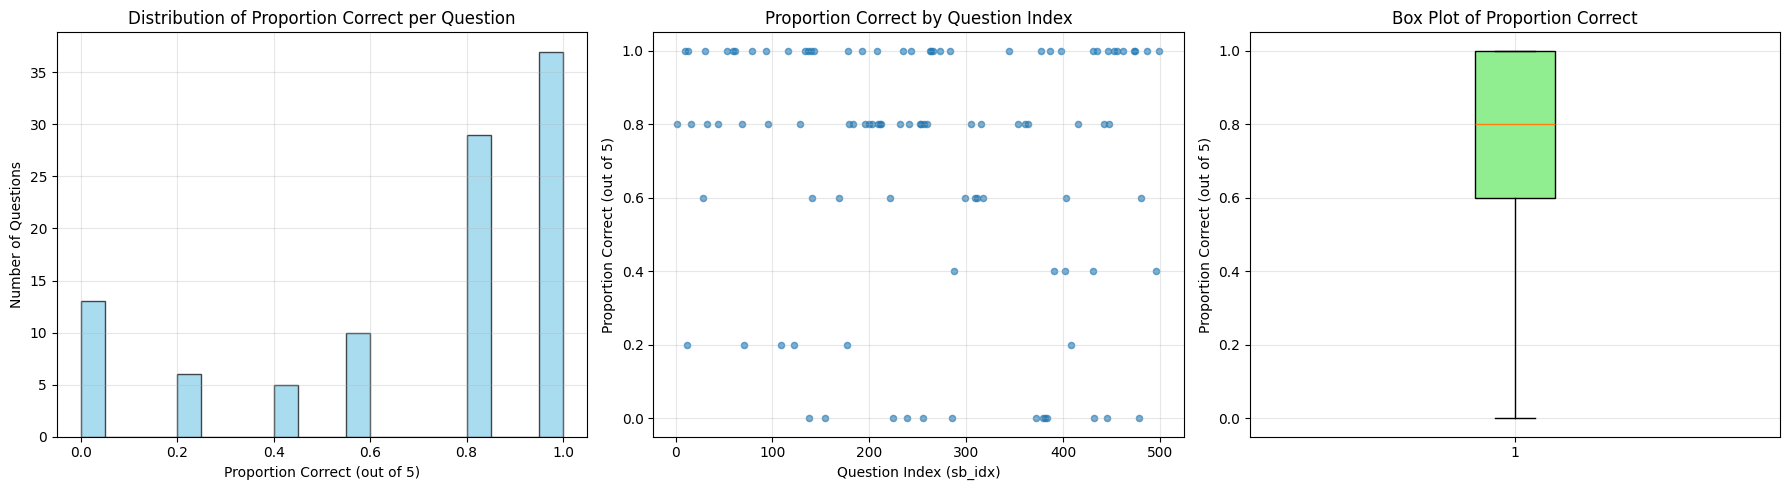


SUMMARY STATISTICS
Minimum proportion correct: 0.0000
25th percentile: 0.6000
Median proportion correct: 0.8000
75th percentile: 1.0000
Maximum proportion correct: 1.0000

BREAKDOWN BY PROPORTION CORRECT RANGES
Proportion 0.0-0.2: 13 questions (13.0%)
Proportion 0.2-0.4: 6 questions (6.0%)
Proportion 0.4-0.6: 5 questions (5.0%)
Proportion 0.6-0.8: 10 questions (10.0%)
Proportion 0.8-1.0: 29 questions (29.0%)

Questions with perfect scores (all 5 correct): 37
Questions with no correct answers: 13


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Calculate proportion correct for each question in the test set
# Group by sb_idx and calculate the mean of indicator (which gives us the proportion correct)
proportion_correct = df_test_beam.groupby('sb_idx')['indicator'].mean()

print(f"Number of questions in test set: {len(proportion_correct)}")
print(f"Mean proportion correct across all questions: {proportion_correct.mean():.4f}")
print(f"Std proportion correct across all questions: {proportion_correct.std():.4f}")

# Create the distribution plot
plt.figure(figsize=(18, 5))

# Create histogram
plt.subplot(1, 3, 1)
plt.hist(proportion_correct, bins=20, edgecolor='black', alpha=0.7, color='skyblue')
plt.xlabel('Proportion Correct (out of 5)')
plt.ylabel('Number of Questions')
plt.title('Distribution of Proportion Correct per Question')
plt.grid(True, alpha=0.3)

# Create scatter plot of proportion correct vs question index
plt.subplot(1, 3, 2)
plt.scatter(proportion_correct.index, proportion_correct.values, alpha=0.6, s=20)
plt.xlabel('Question Index (sb_idx)')
plt.ylabel('Proportion Correct (out of 5)')
plt.title('Proportion Correct by Question Index')
plt.grid(True, alpha=0.3)

# Create box plot
plt.subplot(1, 3, 3)
plt.boxplot(proportion_correct, patch_artist=True, boxprops=dict(facecolor='lightgreen'))
plt.ylabel('Proportion Correct (out of 5)')
plt.title('Box Plot of Proportion Correct')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Print summary statistics
print("\n" + "="*60)
print("SUMMARY STATISTICS")
print("="*60)
print(f"Minimum proportion correct: {proportion_correct.min():.4f}")
print(f"25th percentile: {proportion_correct.quantile(0.25):.4f}")
print(f"Median proportion correct: {proportion_correct.median():.4f}")
print(f"75th percentile: {proportion_correct.quantile(0.75):.4f}")
print(f"Maximum proportion correct: {proportion_correct.max():.4f}")

# Count questions by proportion correct ranges
print("\n" + "="*60)
print("BREAKDOWN BY PROPORTION CORRECT RANGES")
print("="*60)
ranges = [(0.0, 0.2), (0.2, 0.4), (0.4, 0.6), (0.6, 0.8), (0.8, 1.0)]
for low, high in ranges:
    count = ((proportion_correct >= low) & (proportion_correct < high)).sum()
    percentage = (count / len(proportion_correct)) * 100
    print(f"Proportion {low:.1f}-{high:.1f}: {count} questions ({percentage:.1f}%)")

# Questions with perfect scores (all 5 correct)
perfect_questions = proportion_correct[proportion_correct == 1.0]
print(f"\nQuestions with perfect scores (all 5 correct): {len(perfect_questions)}")

# Questions with no correct answers
zero_correct_questions = proportion_correct[proportion_correct == 0.0]
print(f"Questions with no correct answers: {len(zero_correct_questions)}")

#### When Lambda = 0.

In [ ]:
adaptive_router_0_lambda = compute_max_utility_pred(df_test_beam, 0)
# view rows 10 through 20.
adaptive_router_0_lambda.iloc[50:60]
# view rows 10 through 20.

/tmp/ipykernel_1640371/961141128.py:17: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result_df = df.groupby("sb_idx").apply(get_max_utility).reset_index()


,sb_idx,max_utility,max_predicted_prob,max_indicator,max_cost,max_time,N,method
50,255,0.045272,0.045272,0,3635,6.02,8,beam_search
51,256,0.999394,0.999394,1,19375,28.97,32,beam_search
52,259,0.988530,0.988530,1,555,1.38,4,beam_search
53,262,1.000000,1.000000,1,4975,10.73,16,beam_search
54,263,1.000000,1.000000,1,18709,27.63,32,beam_search
55,265,1.000000,1.000000,1,15418,26.22,32,beam_search
56,273,0.993995,0.993995,1,8995,16.45,16,beam_search
57,283,0.999833,0.999833,1,12697,21.67,32,beam_search
58,285,0.989581,0.989581,0,36476,68.09,8,beam_search
59,287,0.202937,0.202937,1,21152,31.02,32,beam_search


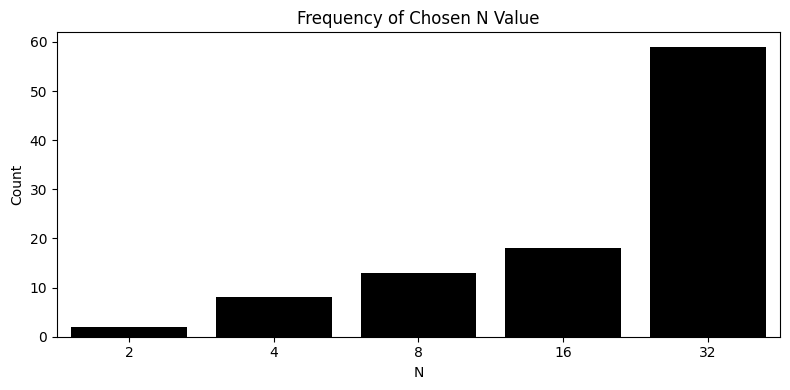

In [ ]:
# Plot: Histogram of N values
plt.figure(figsize=(8, 4))
sns.countplot(data=adaptive_router_0_lambda, x="N", order=sorted(adaptive_router_0_lambda["N"].unique()), color="black")
plt.title("Frequency of Chosen N Value")
plt.xlabel("N")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

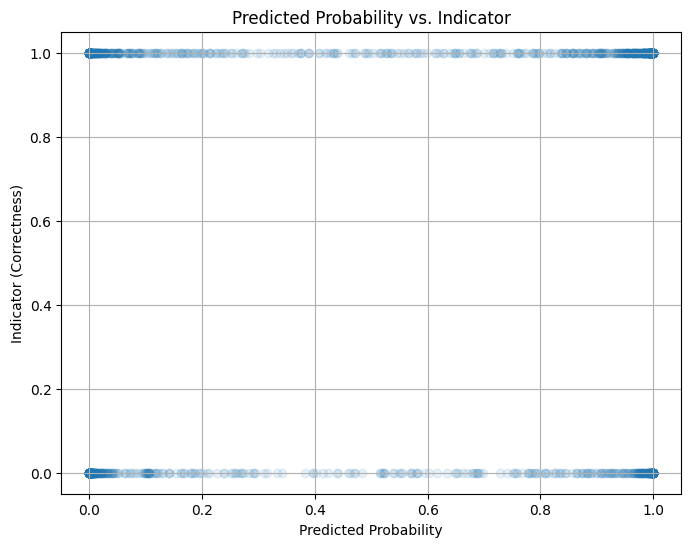

In [ ]:
df_test.head()
# create a scatter plot of predicted probability vs. indicator.
plt.figure(figsize=(8, 6))
plt.scatter(df_test["predicted_prob"], df_test["indicator"], alpha=0.1)
plt.xlabel("Predicted Probability")
plt.ylabel("Indicator (Correctness)")
plt.title("Predicted Probability vs. Indicator")
plt.grid(True)
plt.show()

/tmp/ipykernel_1441362/3196947133.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  calibration = df_test.groupby("bin").agg(


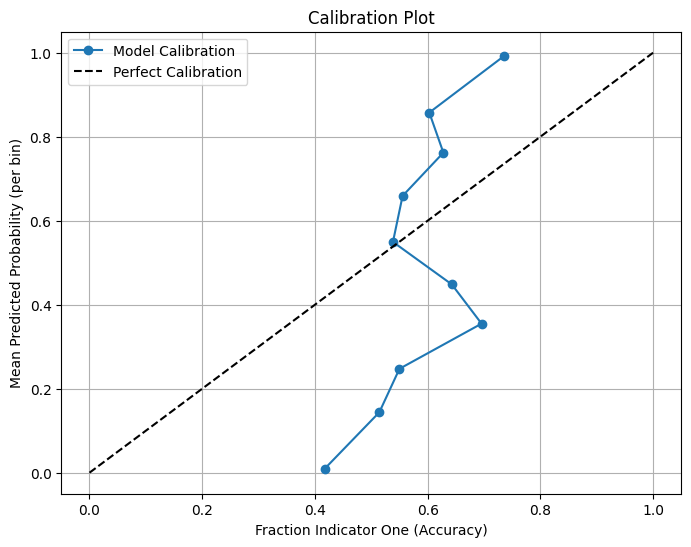

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Define bin edges and assign each predicted_prob to a bin
num_bins = 10
df_test["bin"] = pd.cut(df_test["predicted_prob"], bins=np.linspace(0, 1, num_bins + 1), include_lowest=True)

# Group by bins and compute average predicted prob and accuracy
calibration = df_test.groupby("bin").agg(
    avg_pred_prob=("predicted_prob", "mean"),
    accuracy=("indicator", "mean"),
    count=("indicator", "count")
).dropna()

# Plot calibration curve with flipped axes
plt.figure(figsize=(8, 6))
plt.plot(calibration["accuracy"], calibration["avg_pred_prob"], marker='o', label="Model Calibration")
plt.plot([0, 1], [0, 1], 'k--', label="Perfect Calibration")
plt.xlabel("Fraction Indicator One (Accuracy)")
plt.ylabel("Mean Predicted Probability (per bin)")
plt.title("Calibration Plot")
plt.grid(True)
plt.legend()
plt.show()


In [ ]:
# Sweep over lambda values
lambda_list = np.logspace(-50, -1, num=200) 

In [ ]:
results = []

for lambda_value in lambda_list:
    adaptive_router = compute_max_utility_pred(df_test_beam, lambda_value)
    average_accuracy = adaptive_router["max_indicator"].mean() # accuracy as a percentage of questions (out of all questions in the test set) answered correctly.
    average_cost = adaptive_router["max_cost"].mean()
    average_time = adaptive_router["max_time"].mean()
    average_predicted_prob = adaptive_router["max_predicted_prob"].mean()
    
    results.append({
        "lambda": lambda_value,
        "indicator": average_accuracy,
        "token_count": average_cost,
        "predicted_prob": average_predicted_prob,
        "time": average_time,
    })

# Convert to DataFrame
query_adaptive_df = pd.DataFrame(results)

/tmp/ipykernel_1640371/961141128.py:17: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result_df = df.groupby("sb_idx").apply(get_max_utility).reset_index()
/tmp/ipykernel_1640371/961141128.py:17: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result_df = df.groupby("sb_idx").apply(get_max_utility).reset_index()
/tmp/ipykernel_1640371/961141128.py:17: FutureWarning: DataFrameGroupBy.apply operated on the grouping colum

In [ ]:
query_adaptive_df["method"] = "adaptive"
query_adaptive_df.head()

,lambda,indicator,token_count,predicted_prob,time,method
0,1.000000e-50,0.78,20907.11,0.910672,36.4193,adaptive
1,1.762914e-50,0.78,20907.11,0.910672,36.4193,adaptive
2,3.107866e-50,0.78,20907.11,0.910672,36.4193,adaptive
3,5.478901e-50,0.78,20907.11,0.910672,36.4193,adaptive
4,9.658832e-50,0.78,20907.11,0.910672,36.4193,adaptive


In [ ]:
# rename column indicator to accuracy.
config_summary_df

,N,method,indicator,predicted_prob,token_count,time
0,2,beam_search,0.44,0.445965,1295.12,5.8316
1,4,beam_search,0.65,0.732065,2648.84,7.5129
2,8,beam_search,0.76,0.828260,7009.91,15.6604
3,16,beam_search,0.80,0.857822,14153.17,26.6020
4,32,beam_search,0.82,0.860090,31613.52,54.7503


In [ ]:
# outer join on the shared columns ("accuracy", "avg_cot_token_count")
query_optimal_static_df = pd.merge(
    query_adaptive_df,
    config_summary_df,
    on=["indicator", "token_count", "time", "method"],
    how="outer"
)
query_optimal_static_df.head()
# change NaN to -1 for plotting purposes.
query_optimal_static_df = query_optimal_static_df.fillna(-1)

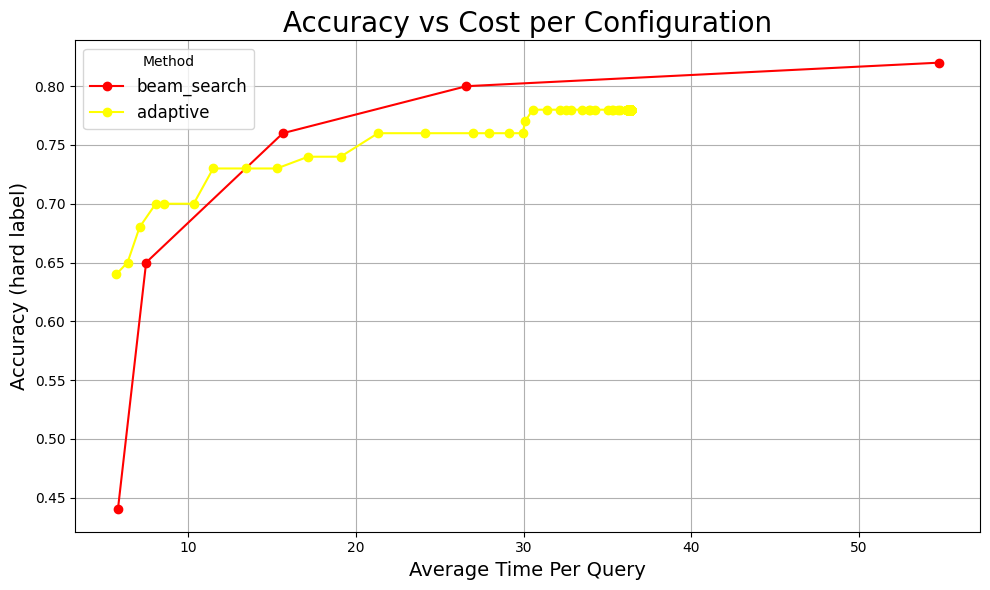

In [ ]:
# Assign unique colors for each method
method_colors = {
    # "majority": "blue",
    # "naive": "orange",
    # "weighted": "green",
    "beam_search": "red",
    "adaptive": "yellow"  # Query-adaptive router
    # "oracle": "yellow"  # Oracle router
}

# Create a figure
plt.figure(figsize=(10, 6))

# Iterate over each method and plot its points and connecting lines
for method in query_optimal_static_df["method"].unique():
    method_df = query_optimal_static_df[query_optimal_static_df["method"] == method]
    color = method_colors.get(method, "adaptive")  # Default to gray if method is unknown
    plt.plot(
        method_df["time"], 
        method_df["indicator"], 
        marker="o", 
        linestyle="-", 
        color=color, 
        label=method
    )

# Add labels and title
plt.xlabel("Average Time Per Query", fontsize=14)
plt.ylabel("Accuracy (hard label)", fontsize=14)
plt.title("Accuracy vs Cost per Configuration", fontsize=20)
plt.legend(title="Method", fontsize=12)
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()

['majorityx1.0', 'naivex1.0', 'weightedx1.0', 'majorityx1.0', 'naivex1.0', 'weightedx1.0', 'majorityx1.0', 'naivex1.0', 'weightedx1.0', 'majorityx2.0', 'qa', 'majorityx4.0', 'naivex2.0', 'weightedx2.0', 'qa', 'naivex4.0', 'weightedx4.0', 'majorityx8.0', 'naivex8.0', 'weightedx8.0', 'majorityx16.0', 'qa', 'naivex16.0', 'naivex32.0', 'majorityx32.0', 'weightedx16.0', 'weightedx32.0', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa']


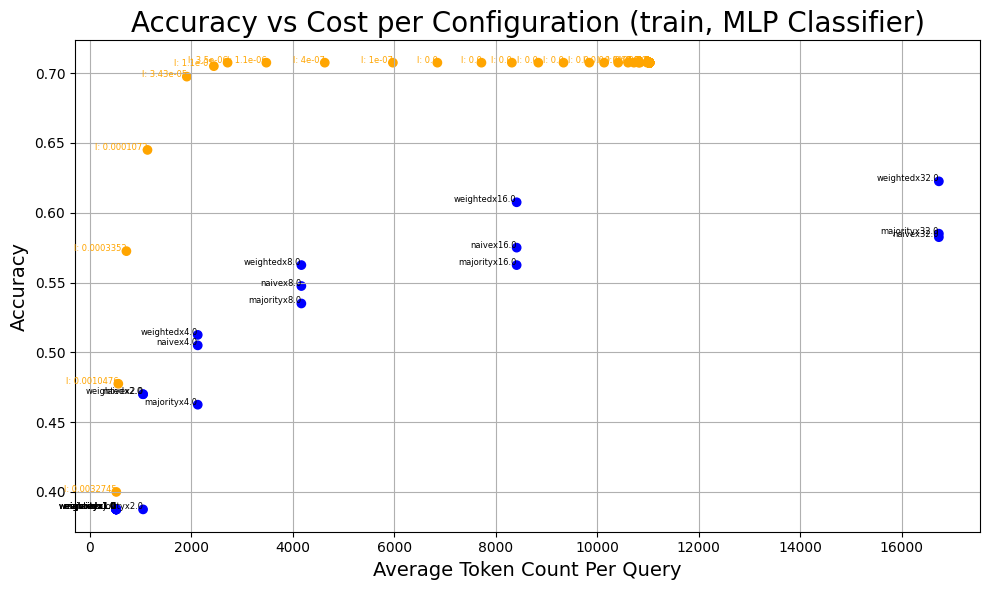

In [ ]:
# Create color labels and text labels (sklearn MLPClassifier)
colors = ['orange' if (row['method']) == -1 else 'blue'
          for _, row in query_optimal_static_df.iterrows()]

text_labels = ["qa" if (row['method']) == -1
               else f"{row['method']}x{row['N']}"
               for _, row in query_optimal_static_df.iterrows()]

print(text_labels)
plt.figure(figsize=(10, 6))
plt.scatter(query_optimal_static_df["token_count"], query_optimal_static_df["indicator"], color=colors)

# Annotate each point
for i, label in enumerate(text_labels):
    if label != "qa":
        plt.annotate(label,
                    (query_optimal_static_df["token_count"][i], query_optimal_static_df["indicator"][i]),
                    textcoords="offset points", xytext=(0, 0), ha='right', fontsize=6, color='black')
    elif label == "qa":
        plt.annotate(f"l: {round(query_optimal_static_df["lambda"][i], 7)}",
                    (query_optimal_static_df["token_count"][i], query_optimal_static_df["indicator"][i]),
                    textcoords="offset points", xytext=(0, 0), ha='right', fontsize=6, color='orange')

plt.xlabel("Average Token Count Per Query", fontsize=14)
plt.ylabel("Accuracy", fontsize=14)
plt.title("Accuracy vs Cost per Configuration (train, MLP Classifier)", fontsize=20)
plt.grid(True)
plt.tight_layout()

['majorityx1.0', 'naivex1.0', 'weightedx1.0', 'majorityx1.0', 'naivex1.0', 'weightedx1.0', 'majorityx1.0', 'naivex1.0', 'weightedx1.0', 'qa', 'qa', 'majorityx2.0', 'qa', 'majorityx4.0', 'naivex2.0', 'weightedx2.0', 'qa', 'naivex4.0', 'weightedx4.0', 'majorityx8.0', 'naivex8.0', 'qa', 'weightedx8.0', 'majorityx16.0', 'naivex16.0', 'naivex32.0', 'majorityx32.0', 'weightedx16.0', 'weightedx32.0', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa']


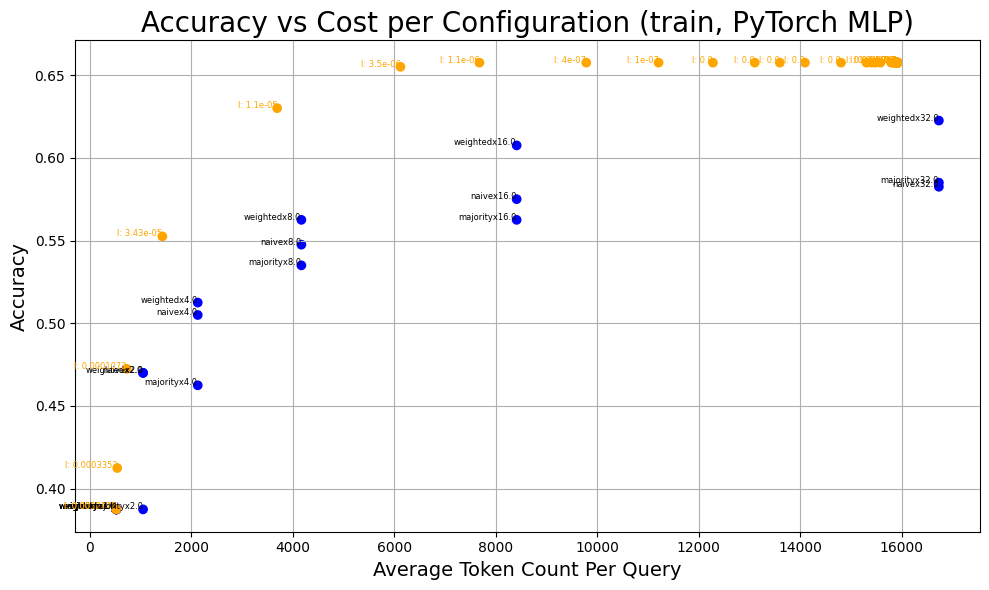

In [ ]:
# Create color labels and text labels (pyTorch MLP)
colors = ['orange' if (row['method']) == -1 else 'blue'
          for _, row in query_optimal_static_df.iterrows()]

text_labels = ["qa" if (row['method']) == -1
               else f"{row['method']}x{row['N']}"
               for _, row in query_optimal_static_df.iterrows()]

print(text_labels)
plt.figure(figsize=(10, 6))
plt.scatter(query_optimal_static_df["token_count"], query_optimal_static_df["indicator"], color=colors)

# Annotate each point
for i, label in enumerate(text_labels):
    if label != "qa":
        plt.annotate(label,
                    (query_optimal_static_df["token_count"][i], query_optimal_static_df["indicator"][i]),
                    textcoords="offset points", xytext=(0, 0), ha='right', fontsize=6, color='black')
    elif label == "qa":
        plt.annotate(f"l: {round(query_optimal_static_df["lambda"][i], 7)}",
                    (query_optimal_static_df["token_count"][i], query_optimal_static_df["indicator"][i]),
                    textcoords="offset points", xytext=(0, 0), ha='right', fontsize=6, color='orange')

plt.xlabel("Average Token Count Per Query", fontsize=14)
plt.ylabel("Accuracy", fontsize=14)
plt.title("Accuracy vs Cost per Configuration (train, PyTorch MLP)", fontsize=20)
plt.grid(True)
plt.tight_layout()

['majorityx1.0', 'naivex1.0', 'weightedx1.0', 'majorityx1.0', 'naivex1.0', 'weightedx1.0', 'majorityx1.0', 'naivex1.0', 'weightedx1.0', 'majorityx2.0', 'qa', 'majorityx4.0', 'naivex2.0', 'weightedx2.0', 'qa', 'naivex4.0', 'weightedx4.0', 'majorityx8.0', 'naivex8.0', 'weightedx8.0', 'majorityx16.0', 'qa', 'naivex16.0', 'naivex32.0', 'majorityx32.0', 'weightedx16.0', 'weightedx32.0', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa']


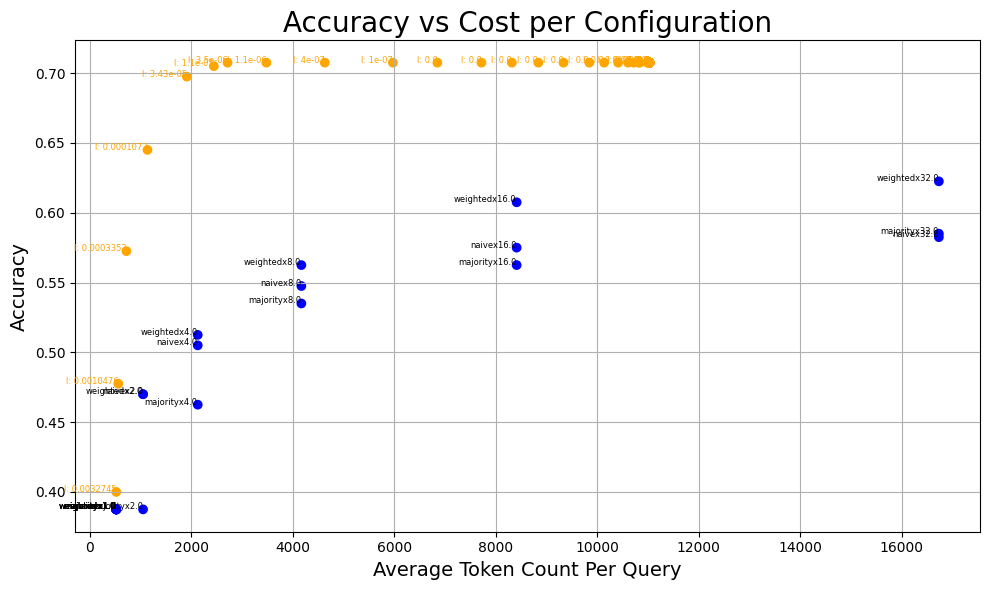

In [ ]:
# Create color labels and text labels
colors = ['orange' if (row['method']) == -1 else 'blue'
          for _, row in query_optimal_static_df.iterrows()]

text_labels = ["qa" if (row['method']) == -1
               else f"{row['method']}x{row['N']}"
               for _, row in query_optimal_static_df.iterrows()]

print(text_labels)
plt.figure(figsize=(10, 6))
plt.scatter(query_optimal_static_df["token_count"], query_optimal_static_df["indicator"], color=colors)

# Annotate each point
for i, label in enumerate(text_labels):
    if label != "qa":
        plt.annotate(label,
                    (query_optimal_static_df["token_count"][i], query_optimal_static_df["indicator"][i]),
                    textcoords="offset points", xytext=(0, 0), ha='right', fontsize=6, color='black')
    elif label == "qa":
        plt.annotate(f"l: {round(query_optimal_static_df["lambda"][i], 7)}",
                    (query_optimal_static_df["token_count"][i], query_optimal_static_df["indicator"][i]),
                    textcoords="offset points", xytext=(0, 0), ha='right', fontsize=6, color='orange')

plt.xlabel("Average Token Count Per Query", fontsize=14)
plt.ylabel("Accuracy", fontsize=14)
plt.title("Accuracy vs Cost per Configuration", fontsize=20)
plt.grid(True)
plt.tight_layout()

# plt.savefig("figs/accuracy_vs_cost_by_config3", dpi=300, bbox_inches='tight')

# notes: make sure we are plotting the accuracy. the probe should pick the weighted response.
# should not go below the blue dots. (check what you are actually plotting).